# Helper: Einlesen von aktuellen Ergebnissen

In [7]:
import os
import json

from datetime import datetime

def cached(func):
    cache = {}
    
    def cached_func(arg):
        if arg not in cache:
            cache[arg] = func(arg)
            
        return cache[arg]
    
    return cached_func

@cached
def read_latest_result(keyword):
    keyword_dir = get_keyword_dir(keyword)
    
    if not os.path.isdir(keyword_dir):
        return None
    
    to_datetime = lambda x: datetime.fromisoformat(os.path.splitext(x)[0])
    
    file_name = max(os.listdir(keyword_dir),
                    key=to_datetime)
    
    with open(os.path.join(keyword_dir, file_name), "r") as fd:
        return json.load(fd)

def get_keyword_dir(keyword):
    root_dir = os.path.dirname(os.getcwd())
    return os.path.join(root_dir, "results", keyword[0], keyword)

read_latest_result("winkel")[:3]

[{'name': 'Winkel – Wikipediade.wikipedia.org › wiki › Winkel',
  'link': 'https://de.wikipedia.org/wiki/Winkel',
  'description': 'Ein Winkel ist in der Geometrie ein Teil der Ebene, der von zwei in der Ebene liegenden Strahlen (Halbgeraden) mit gemeinsamem Anfangspunkt begrenzt wird\xa0...\nBegriffsklärung · Rechter Winkel · Stumpfer Winkel · Winkelminute',
  'googleLink': 'http://www.google.com/url?q=https://de.wikipedia.org/wiki/Winkel&sa=U&ved=2ahUKEwiwzfWI0YzvAhVoCTQIHbn8DOcQFjAAegQIBRAB&usg=AOvVaw3-y2PSlkQOIn-7Gxp0PzlW',
  'page': 0,
  'index': 0},
 {'name': 'Was ist ein Winkel und welche Winkelarten gibt es? - Studienkreiswww.studienkreis.de › Online Lernen › Mathematik Aufgaben',
  'link': 'https://www.studienkreis.de/mathematik/winkel-winkelarten/',
  'description': 'Der gemeinsame Anfangspunkt der beiden Strahlen ist dann der Scheitelpunkt des Winkels. winkel-allgemein. Abbildung Winkel aus zwei Geraden mit\xa0...',
  'googleLink': 'http://www.google.com/url?q=https://www.st

# Helper: Bestimmung der Hauptdomain

In [8]:
from urllib.parse import urlparse

def get_domain(url):
    parts = urlparse(url).hostname.split(".")
    domain = ".".join(parts[-2:])
    
    if domain == "wikibooks.org" and ("Freaks" in url or "Serlo" in url):
        return "serlo.org"
    
    return domain

print(get_domain("https://de.wikipedia.org/wiki/Winkel"))
print(get_domain("https://de.wikibooks.org/wiki/Mathe_f%C3%BCr_Nicht-Freaks:_Mitmachen_f%C3%BCr_(Nicht-)Freaks"))
print(get_domain("https://de.wikibooks.org/wiki/Serlo:_EN:_Absolute_value_and_conjugation"))

wikipedia.org
serlo.org
serlo.org


# Helper: Finde die am Besten laufenden Domains in in einer Liste von Keywords

In [9]:
from collections import defaultdict

snd = lambda x: x[1]

def get_best_domains(keywords, blacklist=[], no_domains=9):
    domains = defaultdict(int)
    
    for keyword in keywords:
        for entry in read_latest_result(keyword):
            points = max(0, 50 - entry["index"] - entry["page"] * 10)
            domains[get_domain(entry["link"])] += points
    
    result = [x for x in domains.items() if x[0] not in blacklist]
    result = sorted(result, key=snd, reverse=True)[:no_domains]
    
    return [ r[0] for r in result ]

get_best_domains(["winkel", "analysis", "betrag", "sekante"])

['wikipedia.org',
 'serlo.org',
 'youtube.com',
 'wiktionary.org',
 'learnattack.de',
 'mathebibel.de',
 'mathe-lexikon.at',
 'pons.com',
 'gut-erklaert.de']

# Auswertung

## Auswertung aller Suchbegriffe

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 9 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* wikipedia.org
* lernhelfer.de
* springer.com
* studyflix.de
* mathebibel.de
* sofatutor.com
* spektrum.de
* mathelounge.de

### Tabelle

,serlo.org,youtube.com,wikipedia.org,lernhelfer.de,springer.com,studyflix.de,mathebibel.de,sofatutor.com,spektrum.de,mathelounge.de
keyword,,,,,,,,,,
radikale,NaN,23.0,1.0,18.0,45.0,NaN,NaN,NaN,9.0,NaN
orthogonale affinität,1.0,2.0,25.0,39.0,NaN,NaN,NaN,4.0,NaN,NaN
bedingungen,17.0,NaN,5.0,NaN,NaN,33.0,NaN,NaN,NaN,NaN
gruppen,NaN,41.0,1.0,15.0,NaN,NaN,NaN,NaN,6.0,NaN
geschwindigkeit grundlagen,1.0,3.0,13.0,5.0,19.0,7.0,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,wikipedia.org,lernhelfer.de,springer.com,studyflix.de,mathebibel.de,sofatutor.com,spektrum.de,mathelounge.de
count,1173.000000,1176.000000,1242.000000,563.000000,625.000000,408.000000,374.000000,445.000000,458.000000,438.000000
mean,7.302643,7.164966,5.337359,17.705151,23.524800,11.796569,9.914439,20.049438,21.705240,24.764840
std,9.303086,7.670002,7.824302,12.339291,12.115488,12.028234,10.960722,11.676660,13.081733,12.556762
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,1.000000,8.000000,14.000000,4.000000,3.000000,11.000000,10.000000,15.000000
50%,4.000000,4.000000,2.000000,16.000000,22.000000,7.000000,5.000000,17.000000,19.000000,23.500000
75%,8.000000,8.000000,6.000000,24.500000,32.000000,15.000000,12.000000,28.000000,32.000000,34.000000
max,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000


### Historgramme

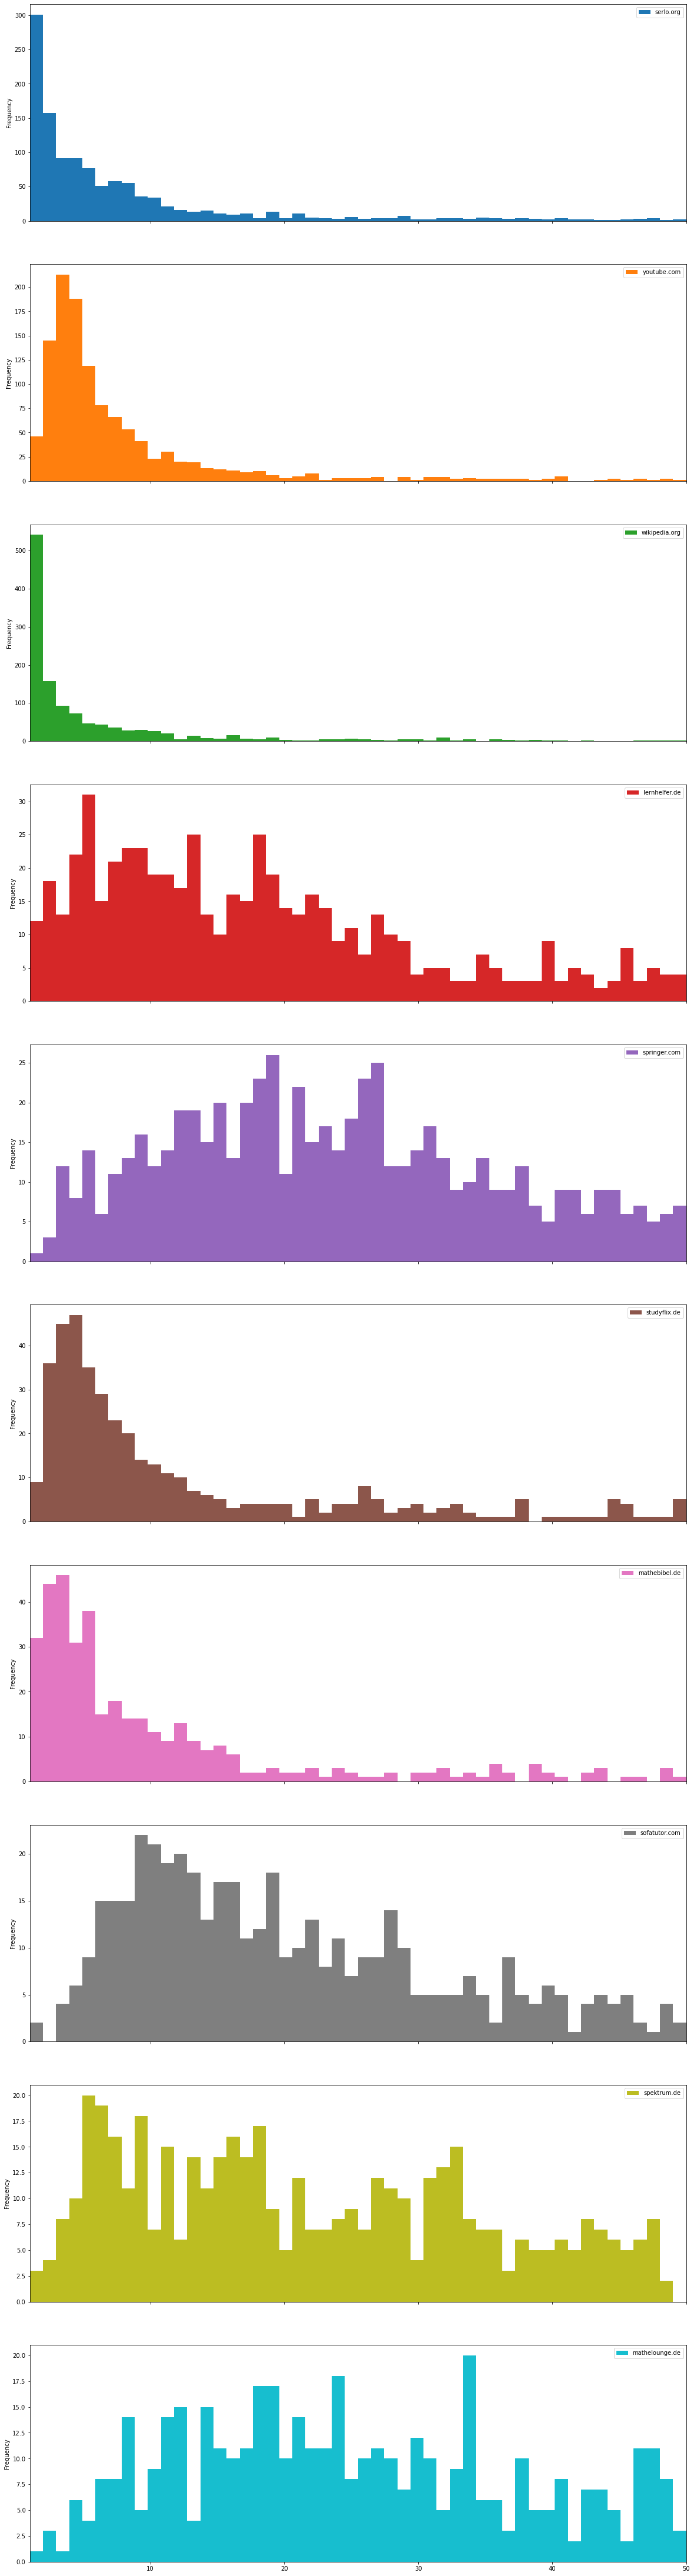

In [10]:
import json
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import display, Markdown

with open("../keywords.json", "r") as fd:
    all_keyword_entries = json.load(fd)

def analyse(query={}, analysed_domains=["serlo.org"],
            compare_domains=None, blacklist=[], no_domains=6):
    def is_in_query(entry):
        return all((entry[key] == value for key, value in query.items()))
    
    keyword_entries = [k for k in all_keyword_entries if is_in_query(k)]
    keywords = [entry["keyword"] for entry in keyword_entries if read_latest_result(entry["keyword"]) != None]
    keywords = list(set(keywords))
    
    compare_domains_orig = compare_domains
    
    if compare_domains == None:    
        compare_domains = get_best_domains(keywords, blacklist=analysed_domains + blacklist,
                                           no_domains = no_domains)
    
    domains = analysed_domains + compare_domains
    
    read_ranking = lambda keyword: [keyword] + [get_best_ranking(keyword, domain) for domain in domains]
        
    df = pd.DataFrame(map(read_ranking, keywords), columns=["keyword"] + domains)
    df.set_index("keyword", inplace=True)
    
    if len(query) > 0:
        query_title = "(" + ", ".join(("%s: %s" % x for x in query.items())) + ")"
    else:
        query_title = "aller Suchbegriffe"
    
    display(Markdown("## Auswertung " + query_title))
    
    if "scope" not in query:
        display(Markdown("Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben."))
    
    display(Markdown("Auswertung für folgende Webseiten:"))
    display_list(analysed_domains)
    
    if compare_domains_orig:
        display(Markdown("Zum Vergleich werden auch die Ergebnisse der folgenden Webseiten angezeigt:"))
        display_list(domains)
    elif no_domains > 0:
        display(Markdown("Zum Vergleich werden die besten %s weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:" % no_domains))
        display_list(compare_domains)
        
        if blacklist:
            display(Markdown("Bei der Analyse der weiteren Webseiten wurde ausgeschlossen"))
            display_list(blacklist)
    
    display(Markdown("### Tabelle"))
    display(df.head())
    
    display(Markdown("### Deskriptive Auswertung"))
    display(df.describe())
    
    display(Markdown("### Historgramme"))
    maxRank = int(df.max().max())
    df.plot.hist(figsize=(20, 8 * len(df.columns)), xlim=(1,maxRank),
                 bins=maxRank, subplots=True)
    plt.show()

def display_list(entries):
    display(Markdown("\n".join(("* " + e for e in entries))))

def get_best_ranking(keyword, domain):
    for index, entry in enumerate(read_latest_result(keyword)):
        if get_domain(entry["link"]) == domain:
            return entry["page"]*10 + entry["index"] + 1

    return None
    
    
analyse(no_domains=9)

# Auswertung nach Fach

## Auswertung (subject: Geographie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* klett.de
* bildungsserver.de
* westermann.de
* spektrum.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,klett.de,bildungsserver.de,westermann.de,spektrum.de
keyword,,,,,,
corioliskraft,13.0,4.0,NaN,6.0,NaN,7.0
aufbau atmosphäre,5.0,7.0,15.0,2.0,34.0,25.0
passatkreislauf bearbeitung,1.0,2.0,18.0,7.0,31.0,NaN
porters diamantenmodell,7.0,29.0,NaN,NaN,NaN,NaN
regenwaldzerstörung,3.0,7.0,8.0,NaN,NaN,17.0


### Deskriptive Auswertung

,serlo.org,youtube.com,klett.de,bildungsserver.de,westermann.de,spektrum.de
count,12.000000,15.000000,10.000000,7.000000,11.000000,11.000000
mean,9.750000,7.800000,8.500000,13.142857,18.818182,20.545455
std,10.584079,7.598872,6.670832,13.520707,10.166791,10.930358
min,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000
25%,2.750000,2.500000,2.500000,5.000000,12.500000,16.500000
50%,6.000000,6.000000,7.000000,7.000000,15.000000,18.000000
75%,13.250000,9.000000,14.750000,18.500000,29.000000,26.000000
max,37.000000,29.000000,18.000000,36.000000,34.000000,46.000000


### Historgramme

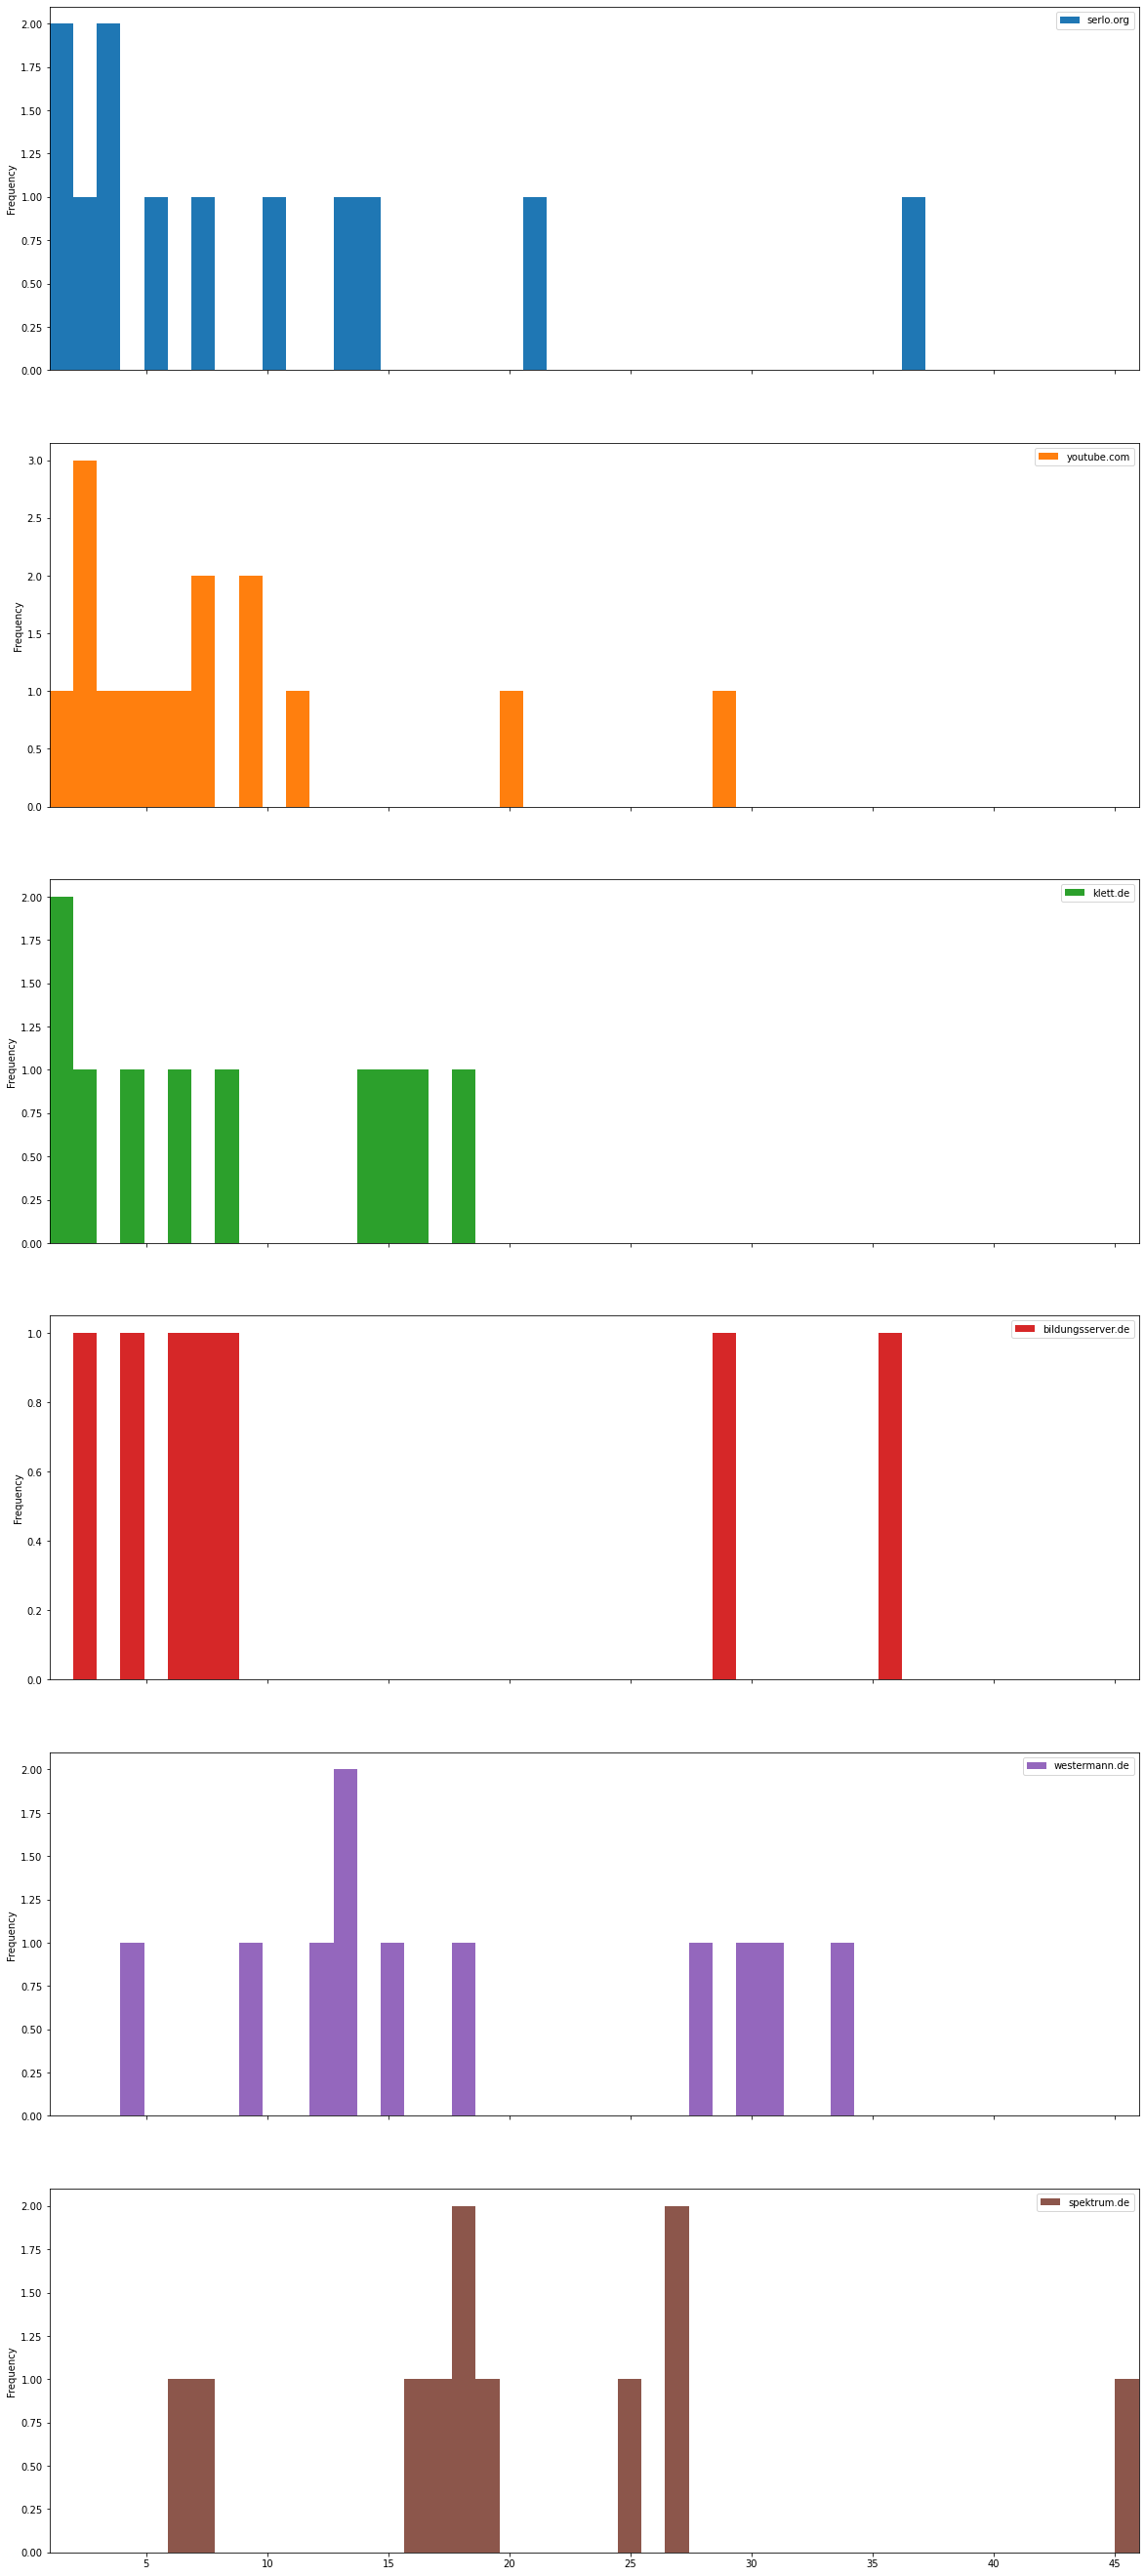

## Auswertung (subject: Mathe)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mathebibel.de
* mathelounge.de
* lernhelfer.de
* springer.com

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,mathebibel.de,mathelounge.de,lernhelfer.de,springer.com
keyword,,,,,,
teilermenge,11.0,4.0,3.0,34.0,NaN,NaN
eigenschaften supremum infimum,1.0,7.0,NaN,33.0,NaN,NaN
properties linear maps,NaN,3.0,NaN,NaN,NaN,21.0
orthogonale affinität,1.0,2.0,NaN,NaN,39.0,NaN
gruppen,NaN,41.0,NaN,NaN,15.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,mathebibel.de,mathelounge.de,lernhelfer.de,springer.com
count,775.000000,788.00000,370.000000,431.00000,366.000000,390.000000
mean,5.392258,5.60533,9.935135,24.61949,19.775956,24.261538
std,6.430784,5.83403,11.013965,12.50782,12.287384,12.100832
min,1.000000,1.00000,1.000000,1.00000,1.000000,2.000000
25%,1.000000,3.00000,3.000000,15.00000,10.000000,15.250000
50%,3.000000,4.00000,5.000000,23.00000,18.000000,24.000000
75%,7.000000,6.00000,12.000000,34.00000,27.000000,33.000000
max,49.000000,49.00000,50.000000,50.00000,50.000000,50.000000


### Historgramme

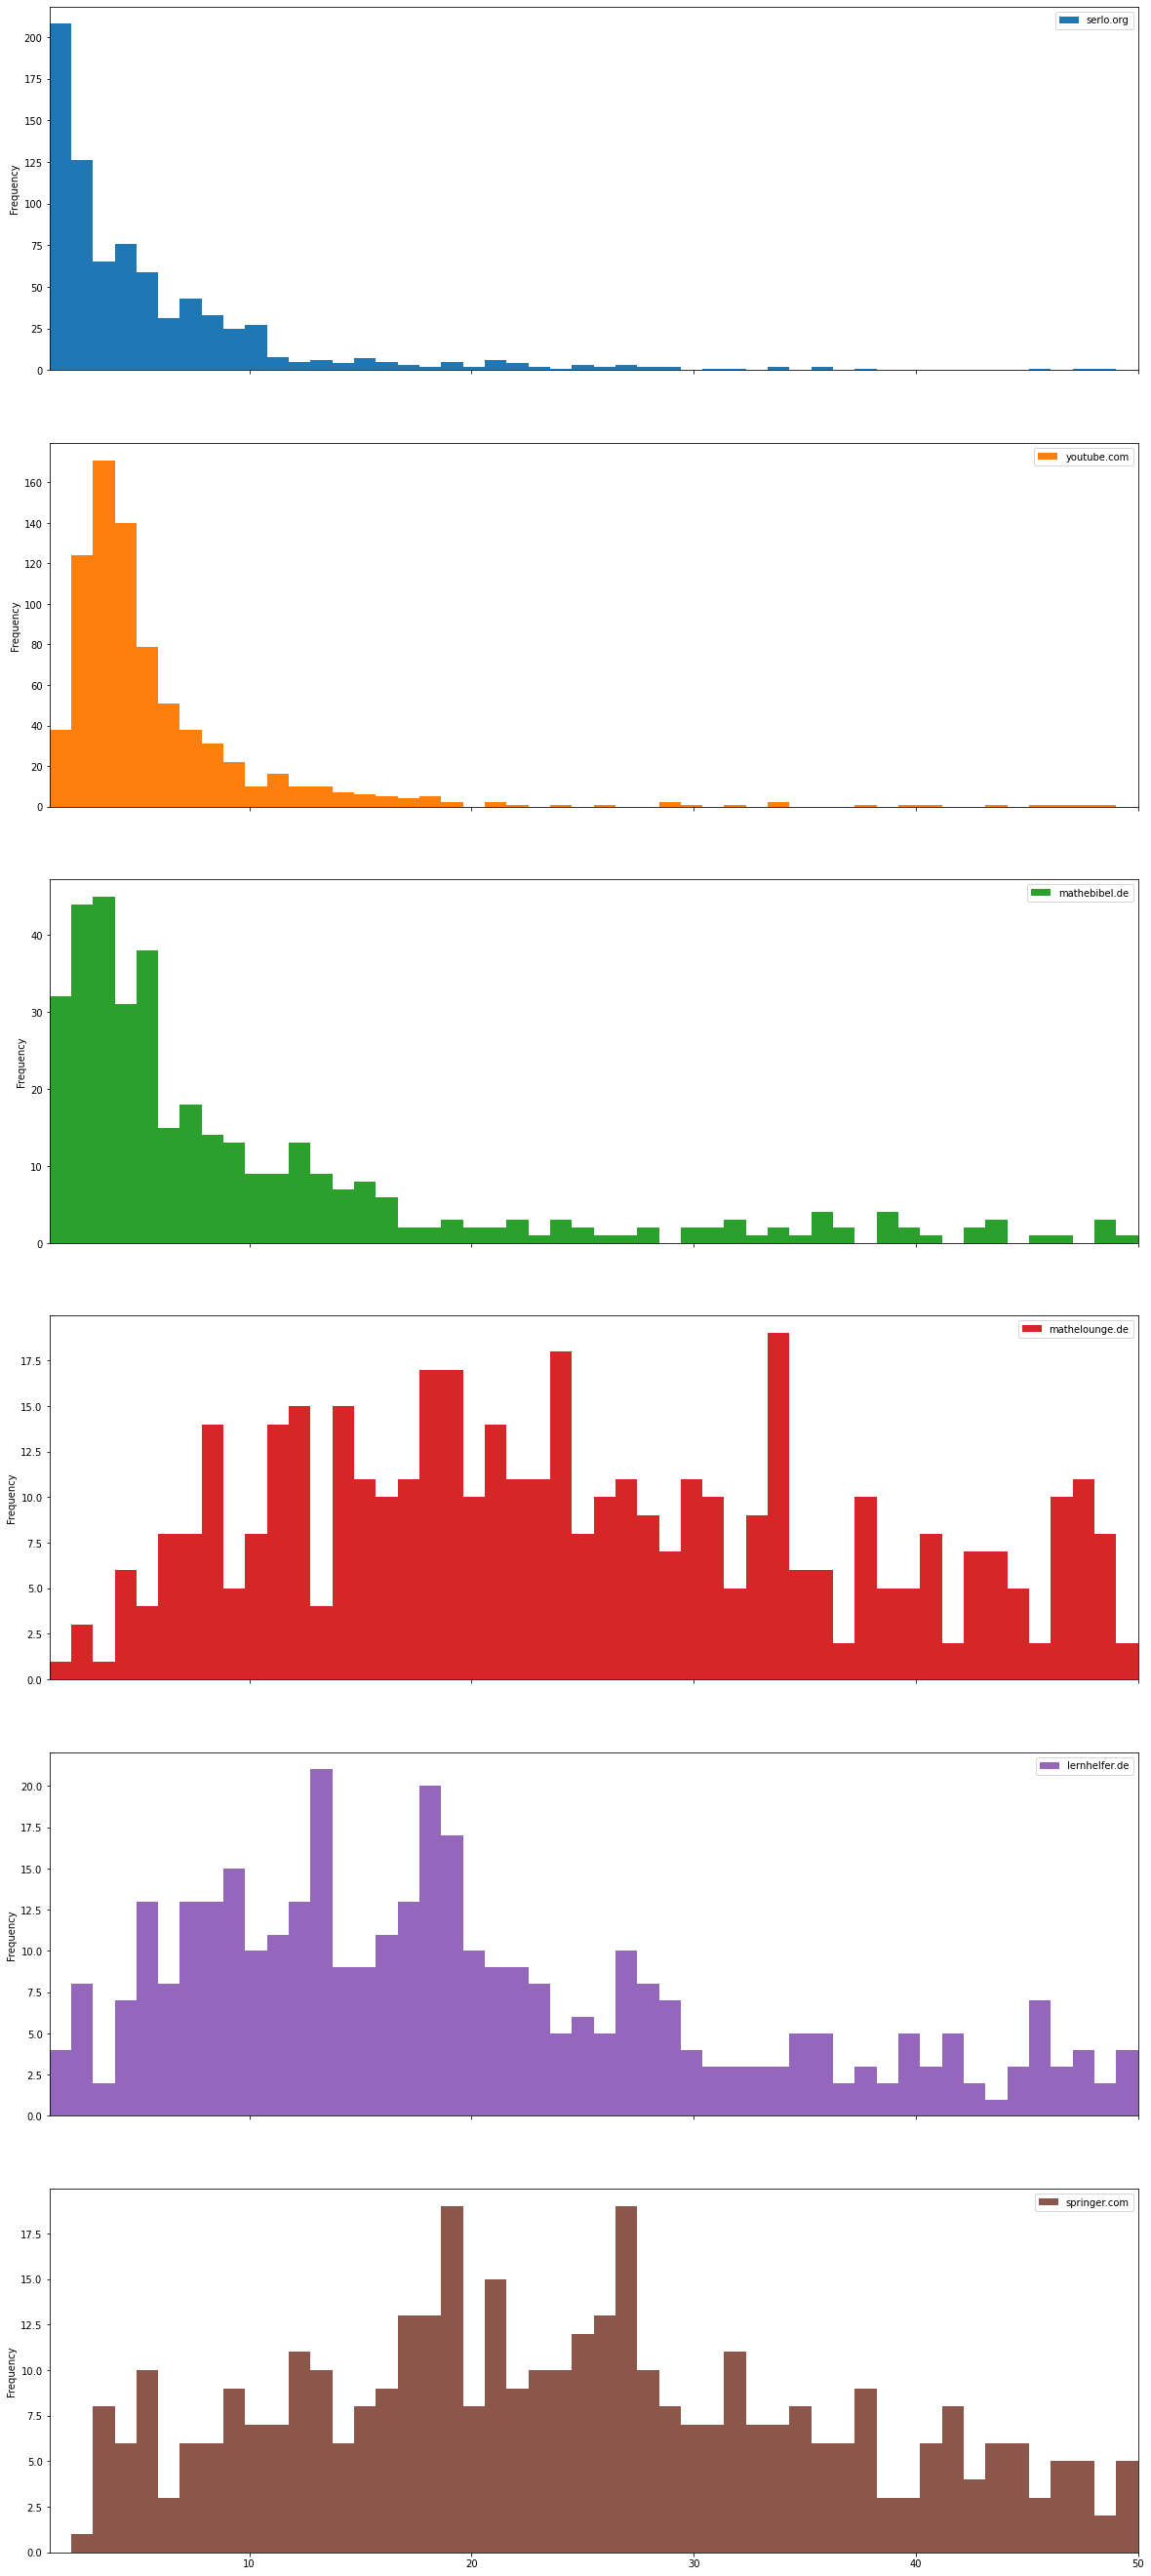

## Auswertung (subject: Chemie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* chemie.de
* chemgapedia.de
* lernhelfer.de
* chemie-schule.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,chemie.de,chemgapedia.de,lernhelfer.de,chemie-schule.de
keyword,,,,,,
radikale,NaN,23.0,3.0,7.0,18.0,4.0
stoffe stoffeigenschaften,3.0,5.0,50.0,NaN,8.0,1.0
optische aktivität,3.0,6.0,2.0,5.0,14.0,NaN
umkehrbare reaktionen,6.0,4.0,18.0,19.0,2.0,12.0
stoffmenge,9.0,3.0,2.0,15.0,4.0,5.0


### Deskriptive Auswertung

,serlo.org,youtube.com,chemie.de,chemgapedia.de,lernhelfer.de,chemie-schule.de
count,88.000000,99.000000,105.000000,88.000000,89.000000,89.000000
mean,14.045455,6.363636,5.247619,15.465909,12.516854,12.651685
std,12.255807,6.019449,6.830054,10.164112,10.769393,11.280616
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,2.000000,8.750000,4.000000,6.000000
50%,9.500000,5.000000,3.000000,13.500000,9.000000,8.000000
75%,20.000000,7.000000,6.000000,19.000000,18.000000,14.000000
max,50.000000,37.000000,50.000000,49.000000,48.000000,50.000000


### Historgramme

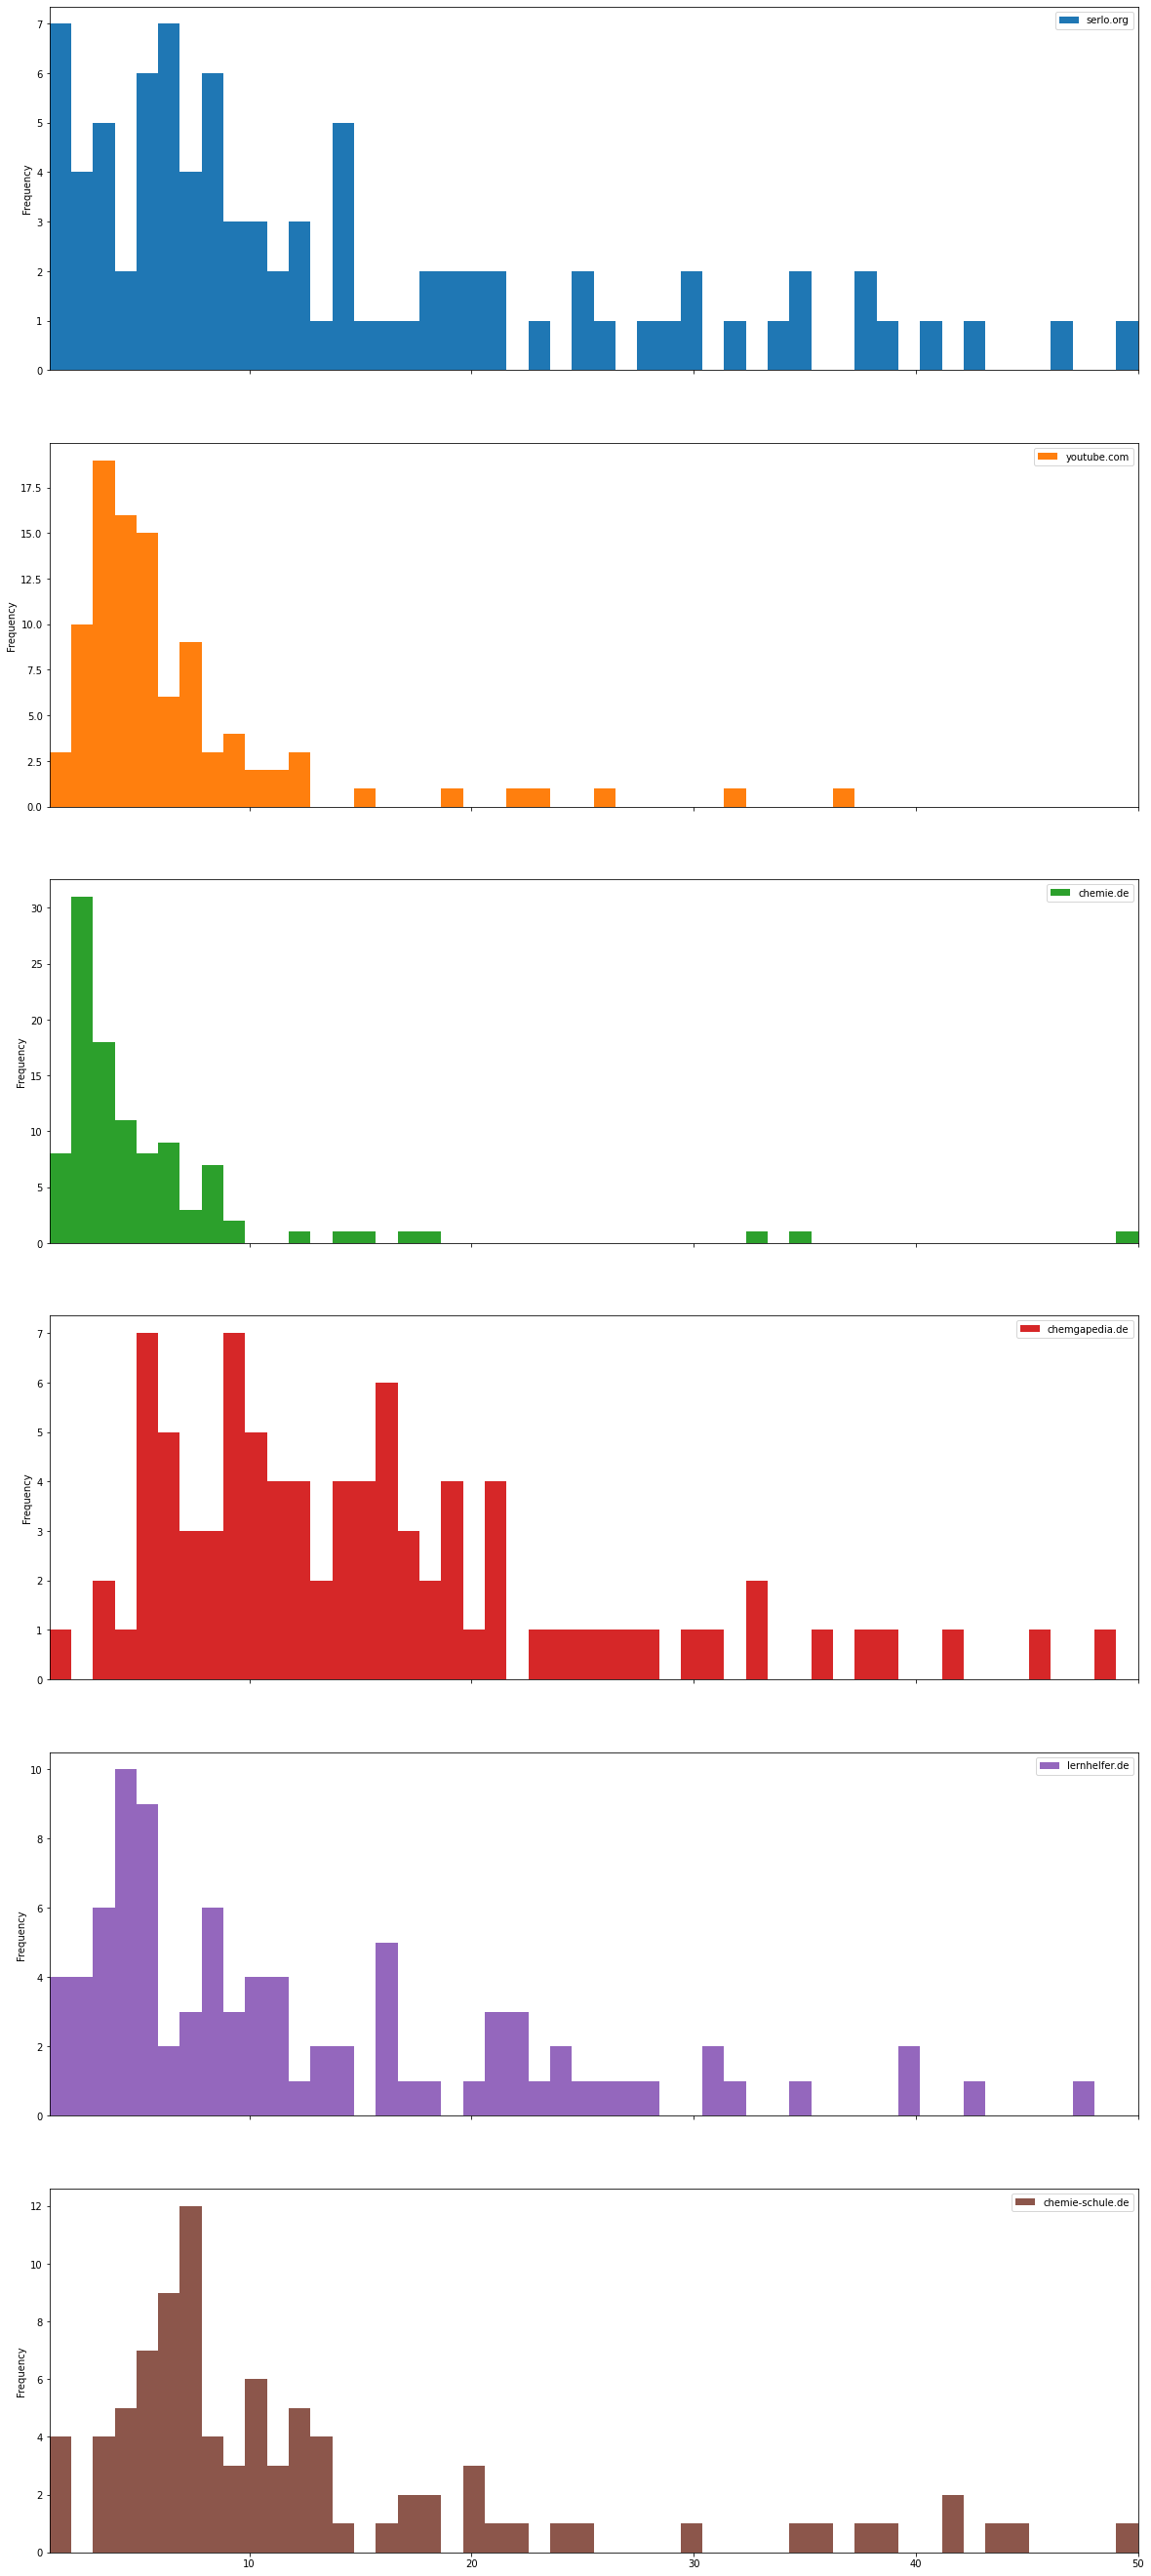

## Auswertung (subject: Physik)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* lernhelfer.de
* leifiphysik.de
* studyflix.de
* spektrum.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,lernhelfer.de,leifiphysik.de,studyflix.de,spektrum.de
keyword,,,,,,
compton effekt,8.0,4.0,6.0,1.0,3.0,12.0
rutherfordscher streuversuch,2.0,NaN,29.0,1.0,4.0,15.0
linsengleichung,17.0,3.0,7.0,2.0,NaN,31.0
elektrische spannung,17.0,4.0,5.0,2.0,3.0,21.0
elektrischer stromkreis,6.0,7.0,4.0,15.0,NaN,18.0


### Deskriptive Auswertung

,serlo.org,youtube.com,lernhelfer.de,leifiphysik.de,studyflix.de,spektrum.de
count,35.000000,37.000000,30.000000,24.000000,27.000000,28.000000
mean,11.342857,5.756757,9.200000,5.458333,8.777778,14.607143
std,12.099934,3.085858,7.818634,5.332258,10.363892,9.346575
min,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000
25%,2.500000,4.000000,3.250000,1.750000,3.000000,6.750000
50%,7.000000,5.000000,6.000000,2.500000,4.000000,13.500000
75%,14.500000,7.000000,13.250000,9.250000,10.500000,21.250000
max,47.000000,15.000000,29.000000,18.000000,38.000000,32.000000


### Historgramme

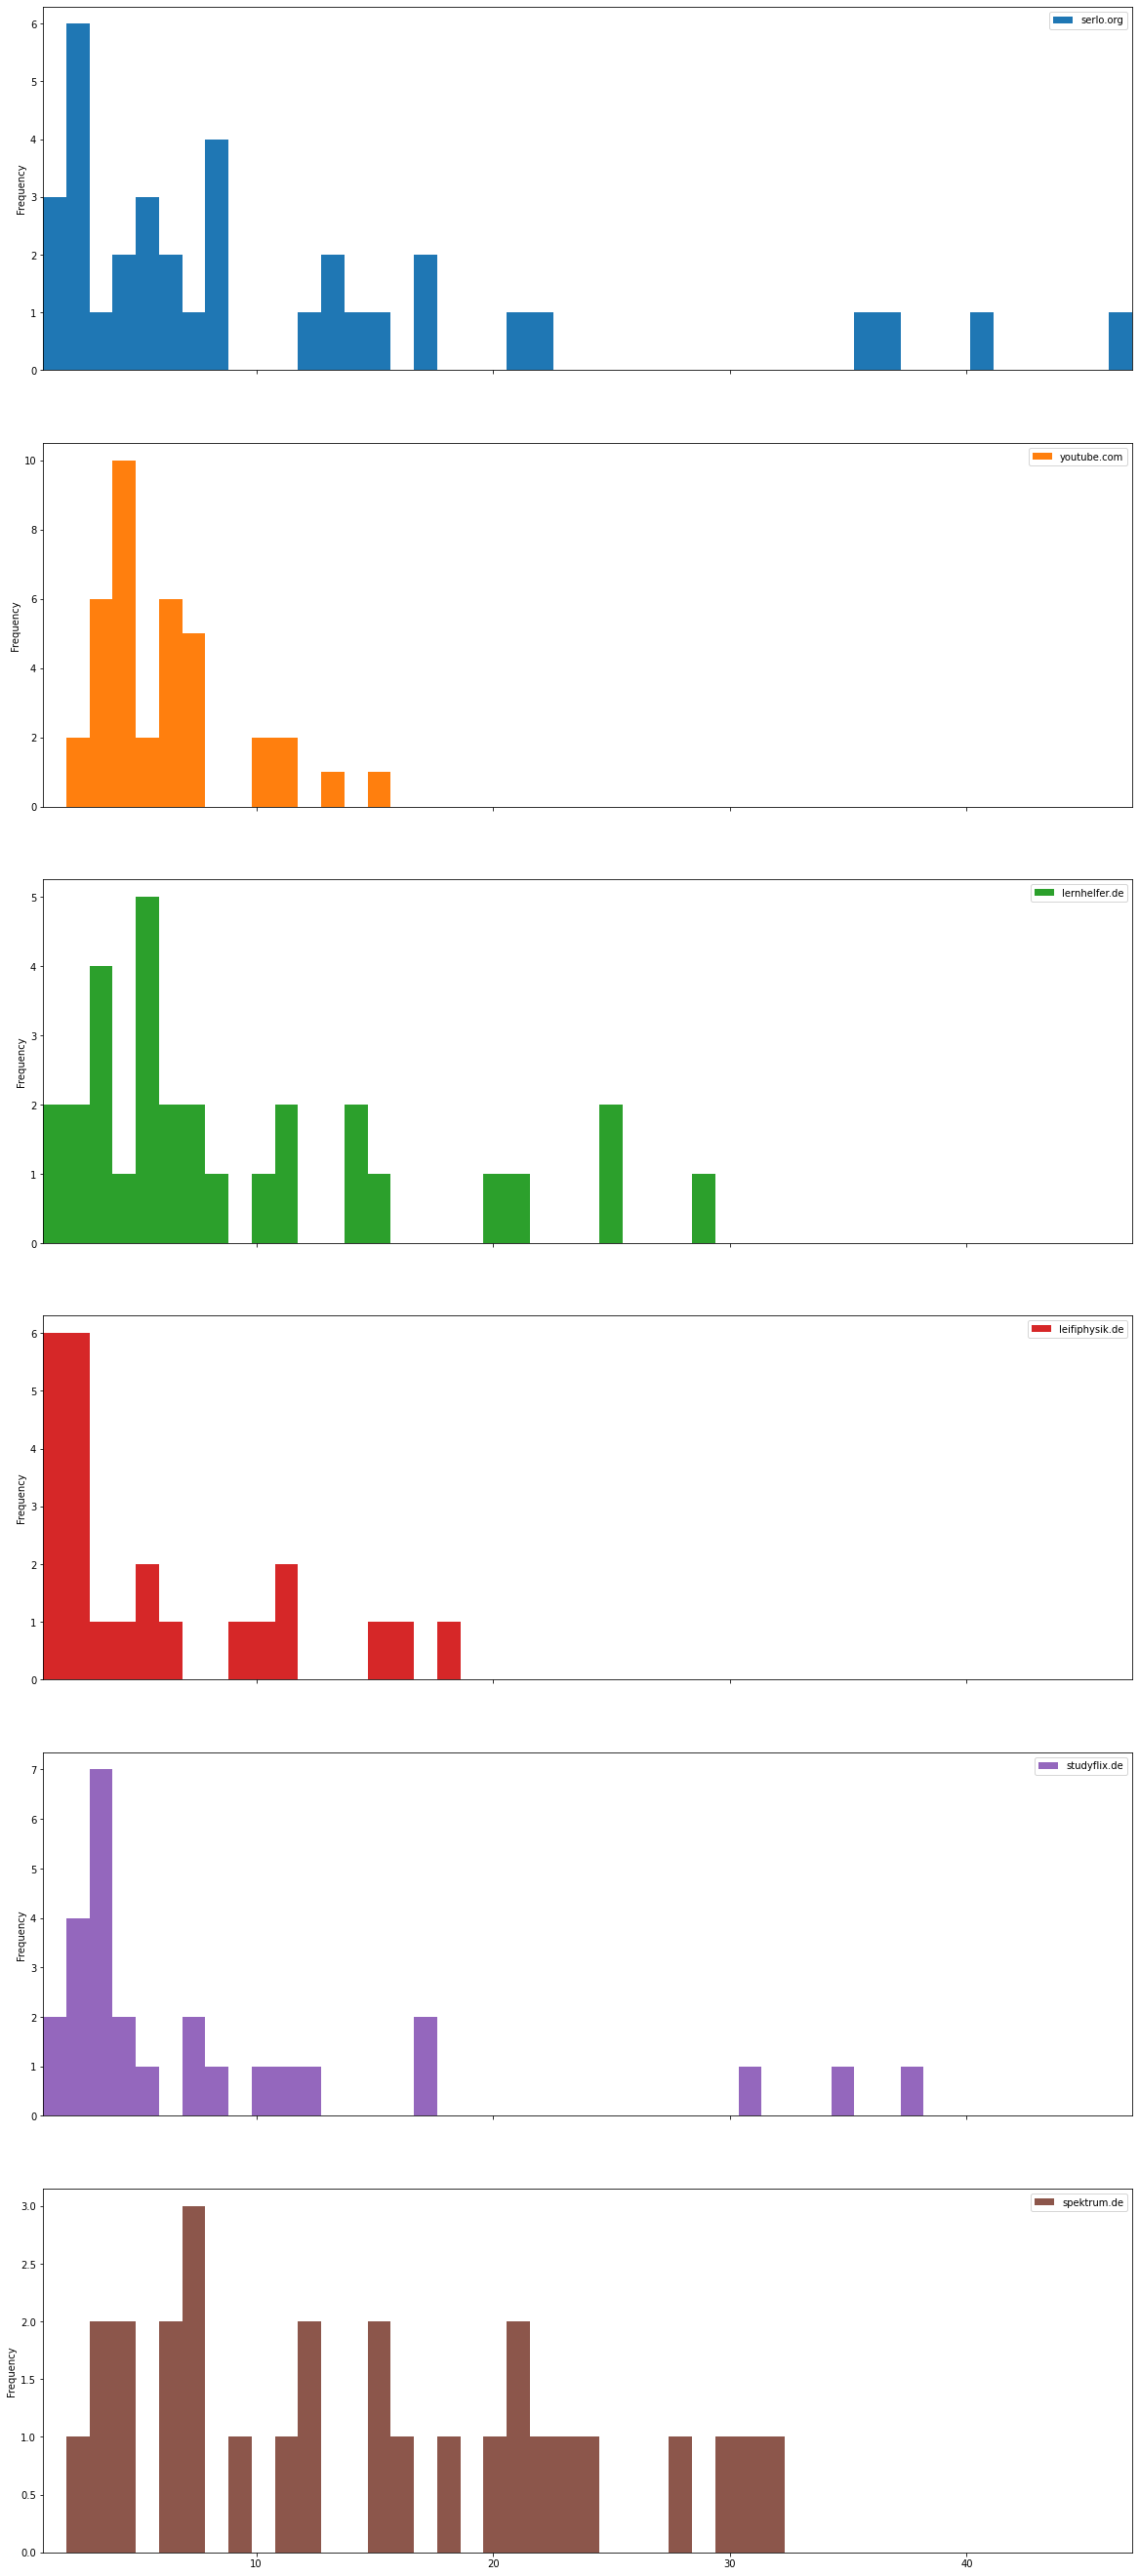

## Auswertung (subject: Biologie)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* spektrum.de
* springer.com
* lernhelfer.de
* doccheck.com

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,spektrum.de,springer.com,lernhelfer.de,doccheck.com
keyword,,,,,,
kooperation,NaN,24.0,7.0,33.0,NaN,NaN
seewespe,6.0,41.0,19.0,NaN,NaN,4.0
knochen aufgebaut,4.0,8.0,NaN,NaN,6.0,10.0
blut,40.0,18.0,NaN,NaN,NaN,4.0
experimente photosynthese,7.0,3.0,28.0,NaN,40.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,spektrum.de,springer.com,lernhelfer.de,doccheck.com
count,114.000000,92.000000,74.000000,74.000000,65.000000,63.000000
mean,6.666667,11.630435,15.581081,21.310811,16.569231,15.714286
std,8.739764,10.027125,11.863385,11.573382,12.362960,13.727097
min,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,1.000000,4.000000,6.000000,13.000000,7.000000,6.000000
50%,4.000000,8.000000,12.000000,21.000000,13.000000,10.000000
75%,8.000000,15.000000,20.500000,30.000000,23.000000,19.500000
max,50.000000,41.000000,49.000000,49.000000,49.000000,49.000000


### Historgramme

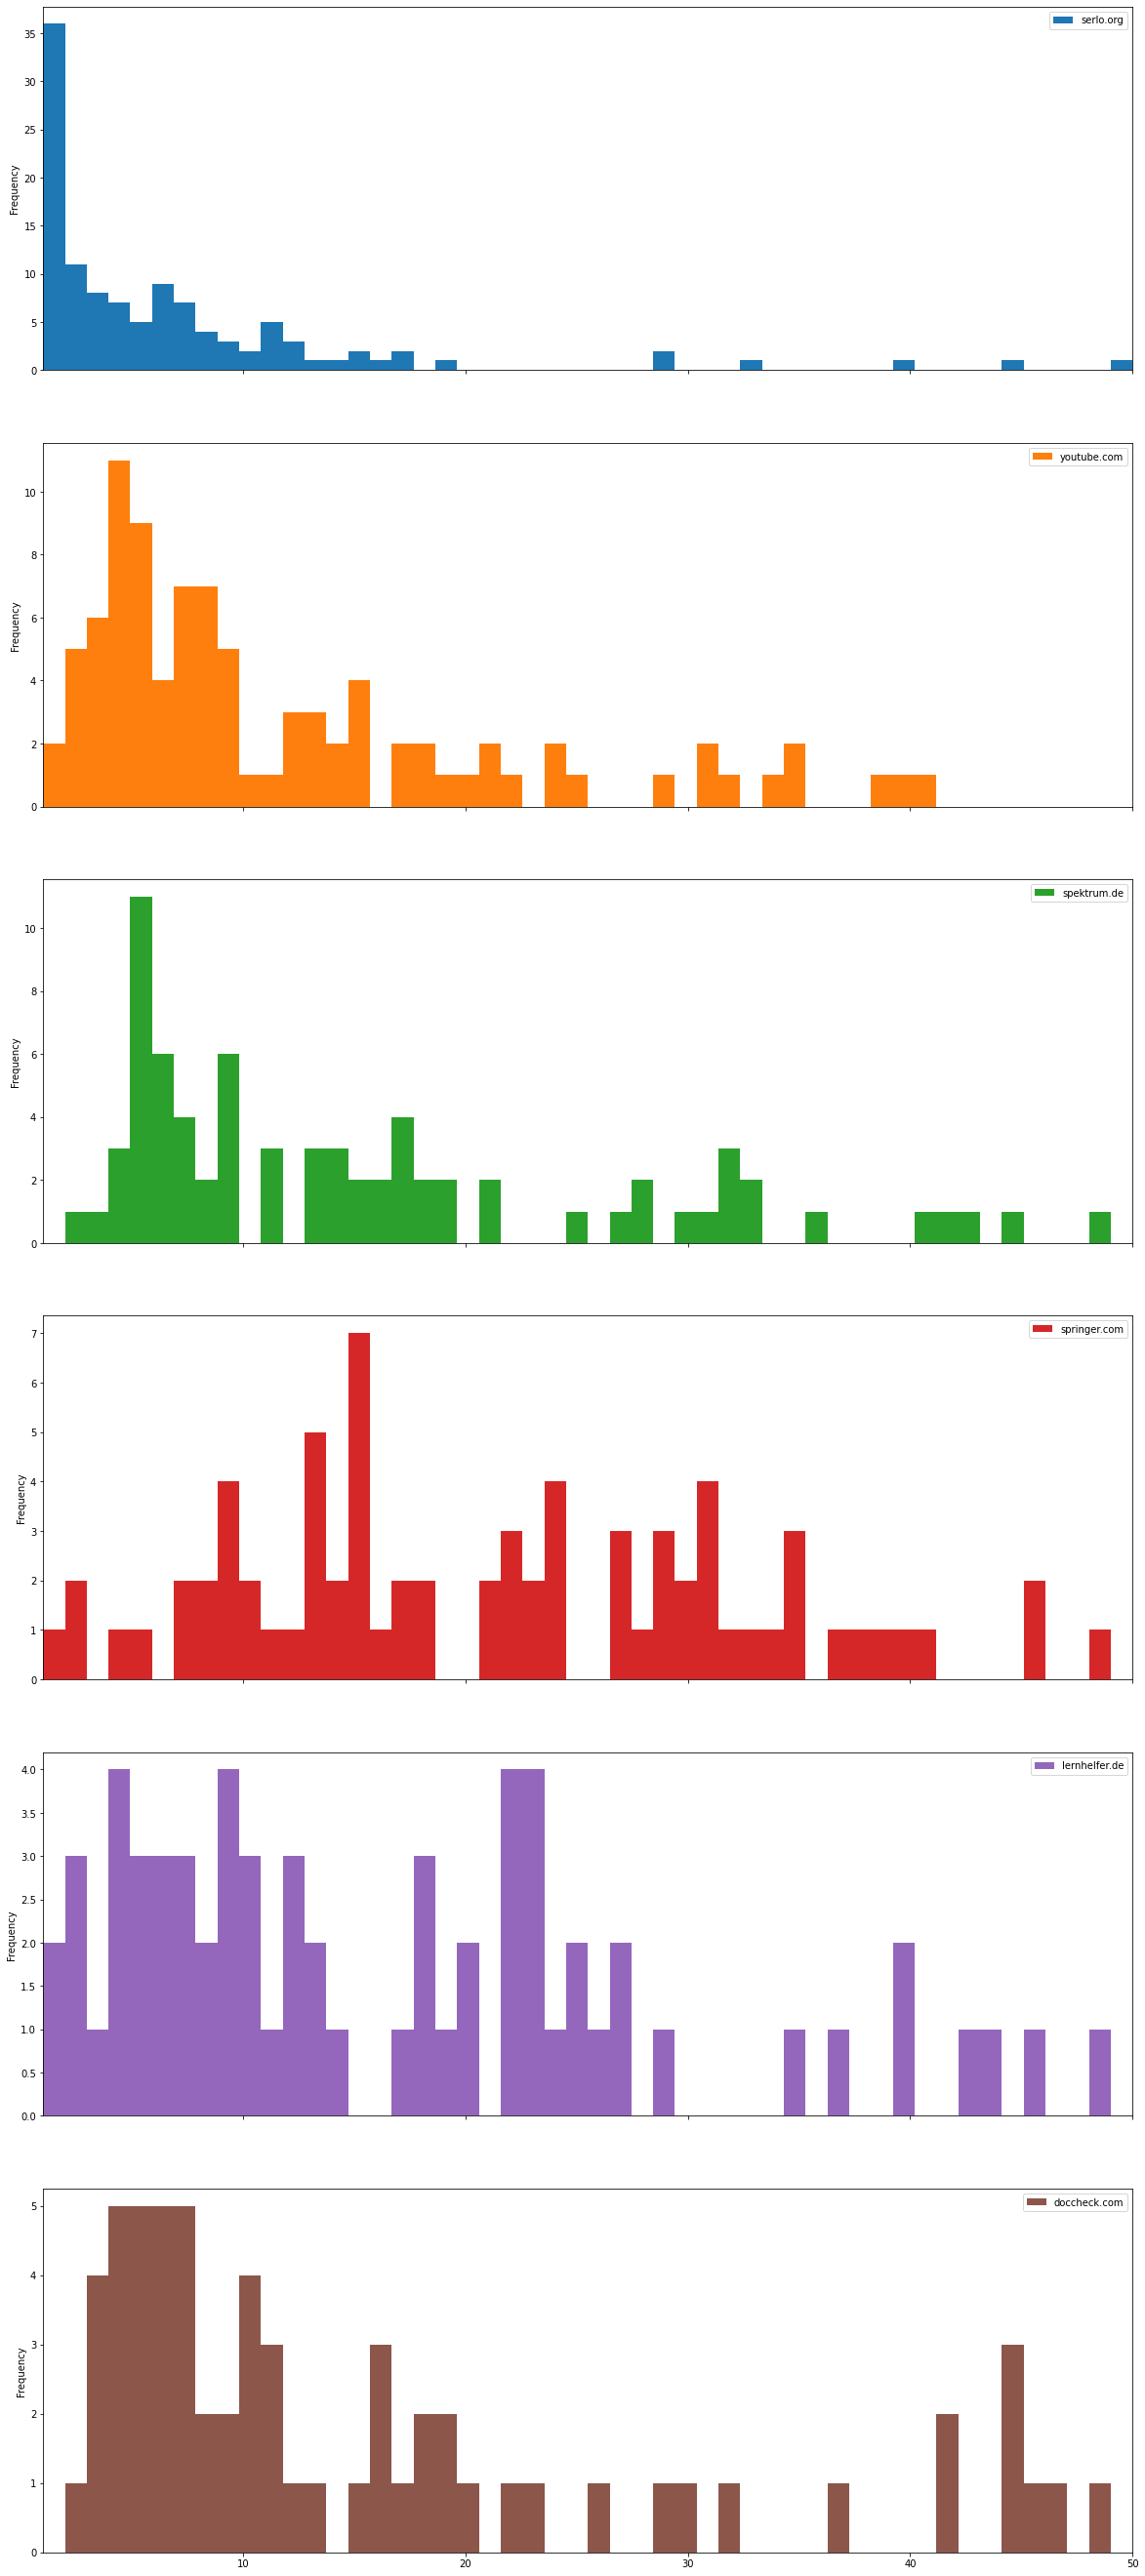

## Auswertung (subject: Wirtschaft)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* gabler.de
* youtube.com
* debitoor.de
* sevdesk.de
* bpb.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,gabler.de,youtube.com,debitoor.de,sevdesk.de,bpb.de
keyword,,,,,,
grundsätze besteuerung,NaN,3.0,NaN,NaN,NaN,7.0
umsatzsteuer,NaN,14.0,9.0,3.0,10.0,17.0
angebot nachfrage,8.0,NaN,4.0,NaN,NaN,18.0
bewerbungsschreiben,NaN,NaN,8.0,NaN,NaN,NaN
cluster,NaN,3.0,6.0,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,gabler.de,youtube.com,debitoor.de,sevdesk.de,bpb.de
count,6.000000,18.000000,17.000000,13.000000,11.000000,14.000000
mean,32.000000,12.722222,13.647059,6.076923,10.545455,23.000000
std,14.184499,11.574849,10.618034,6.157131,8.091522,13.922864
min,8.000000,1.000000,4.000000,1.000000,5.000000,3.000000
25%,26.750000,3.250000,5.000000,2.000000,6.000000,15.500000
50%,34.500000,6.000000,9.000000,4.000000,9.000000,18.500000
75%,40.750000,20.750000,25.000000,7.000000,10.000000,30.250000
max,48.000000,37.000000,38.000000,22.000000,33.000000,50.000000


### Historgramme

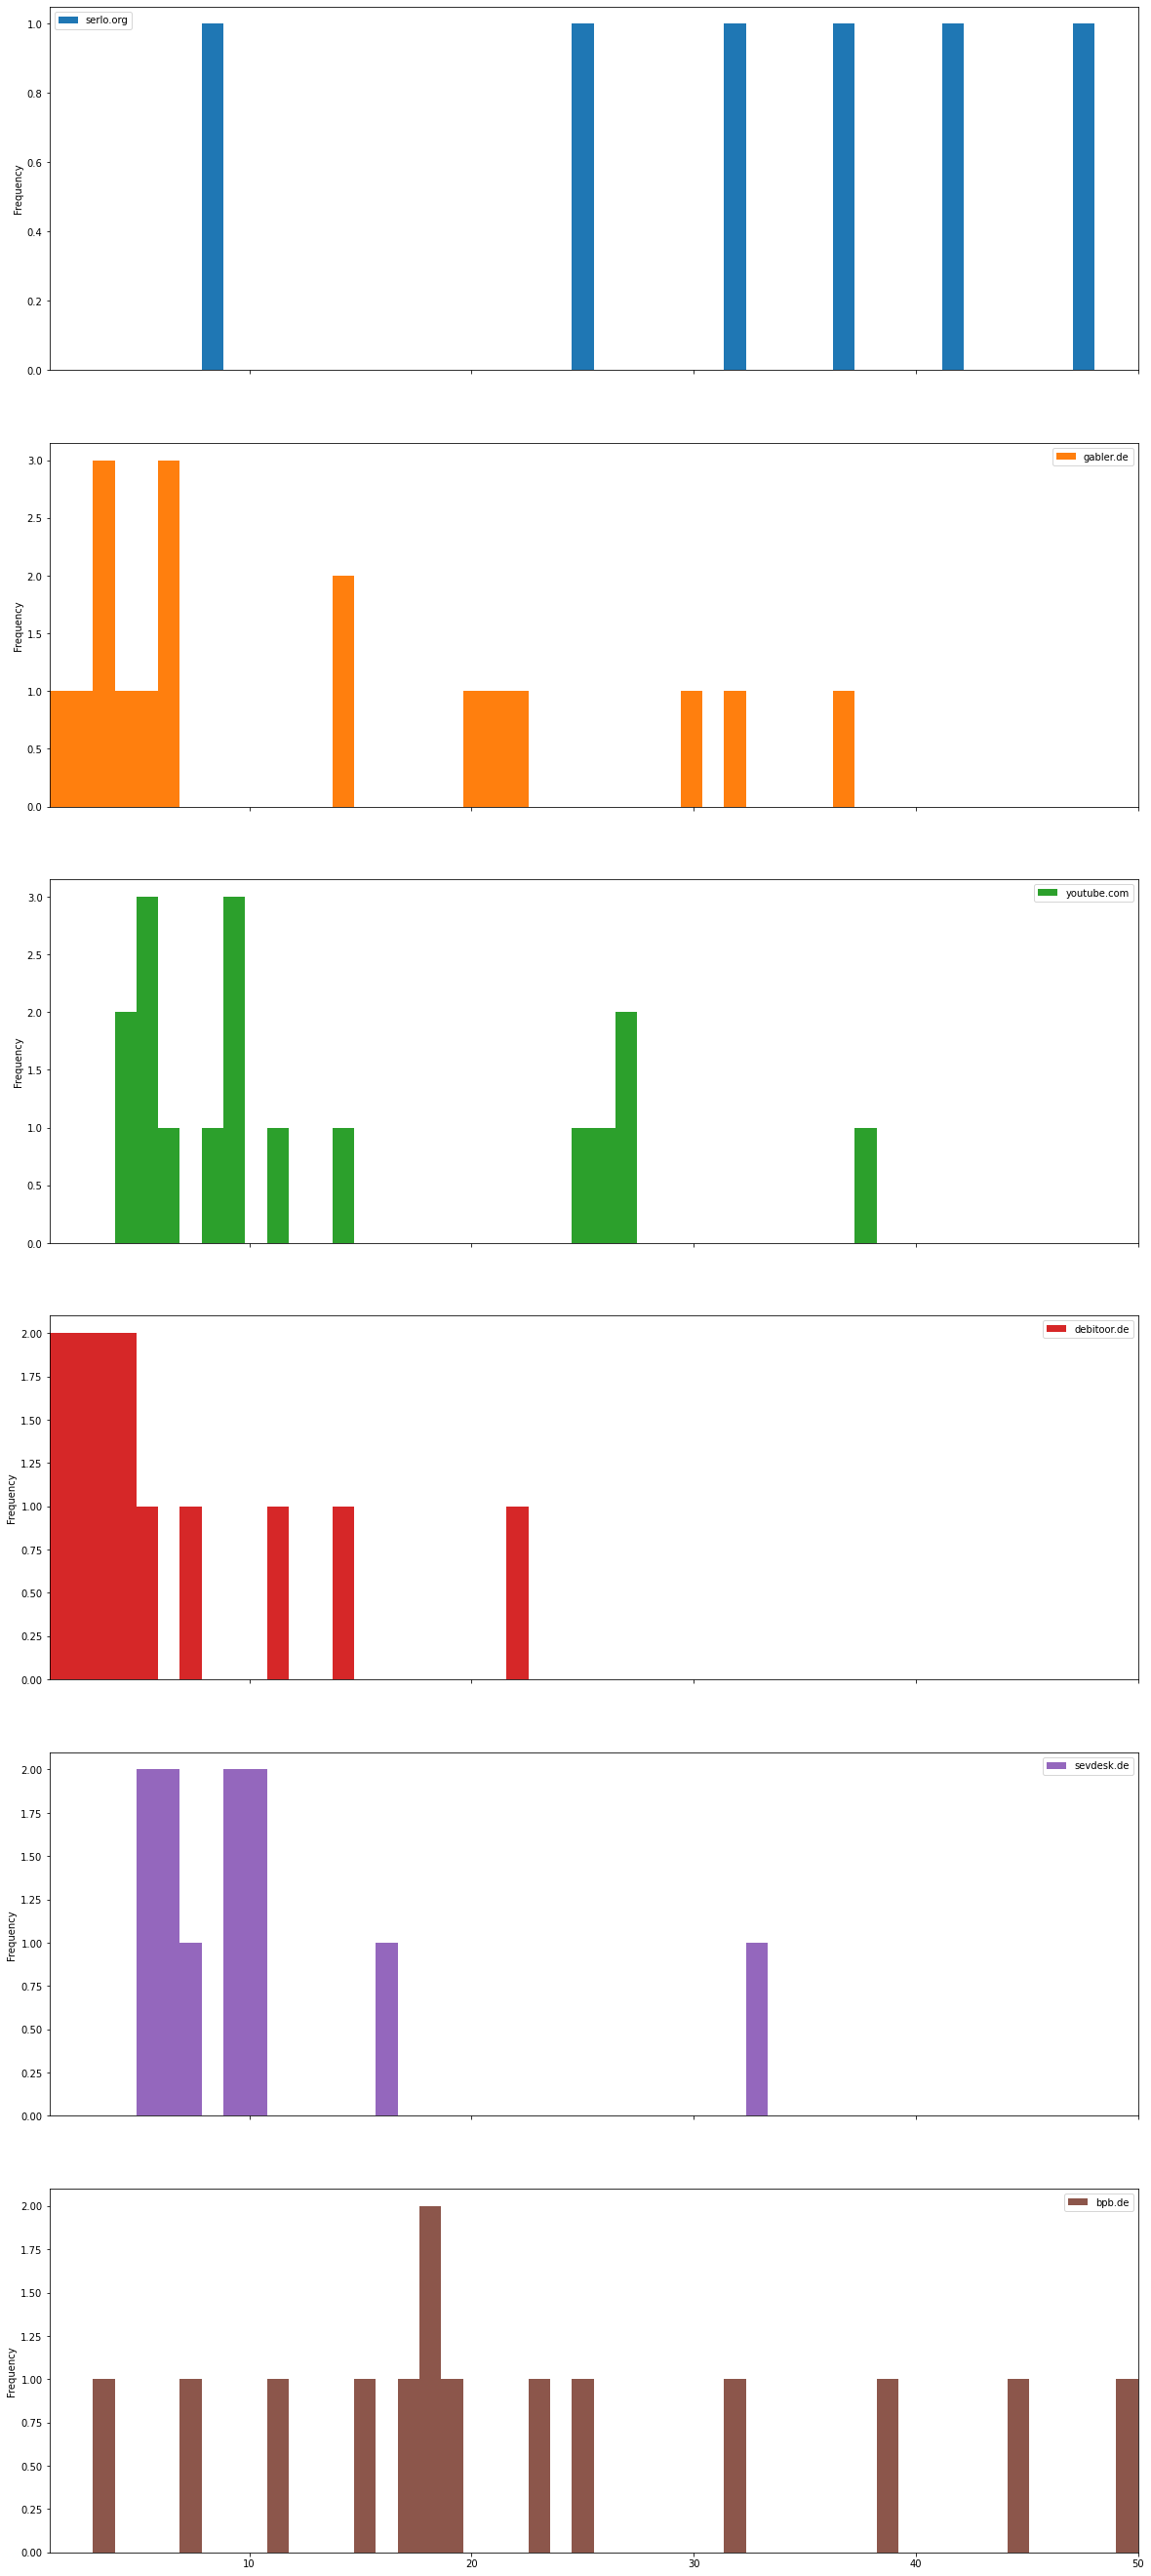

## Auswertung (subject: Informatik)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* microsoft.com
* amazon.de
* linguee.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,springer.com,microsoft.com,amazon.de,linguee.de
keyword,,,,,,
aufbau internets,1.0,NaN,18.0,NaN,NaN,NaN
caesar verschlüsselung,3.0,6.0,NaN,NaN,NaN,NaN
bedingungen,17.0,NaN,NaN,NaN,NaN,10.0
einführung programmierung,NaN,8.0,7.0,NaN,17.0,27.0
struktogramme,14.0,3.0,31.0,NaN,44.0,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,microsoft.com,amazon.de,linguee.de
count,82.000000,68.000000,32.000000,34.000000,38.000000,40.000000
mean,9.853659,12.073529,21.812500,23.794118,26.947368,27.050000
std,12.533532,11.107771,12.475621,14.003851,13.941863,12.121077
min,1.000000,1.000000,3.000000,1.000000,1.000000,3.000000
25%,1.000000,5.000000,12.750000,13.250000,17.500000,17.750000
50%,4.500000,8.000000,19.500000,22.500000,26.000000,27.000000
75%,12.000000,14.500000,27.500000,35.000000,41.000000,38.250000
max,48.000000,49.000000,49.000000,50.000000,50.000000,47.000000


### Historgramme

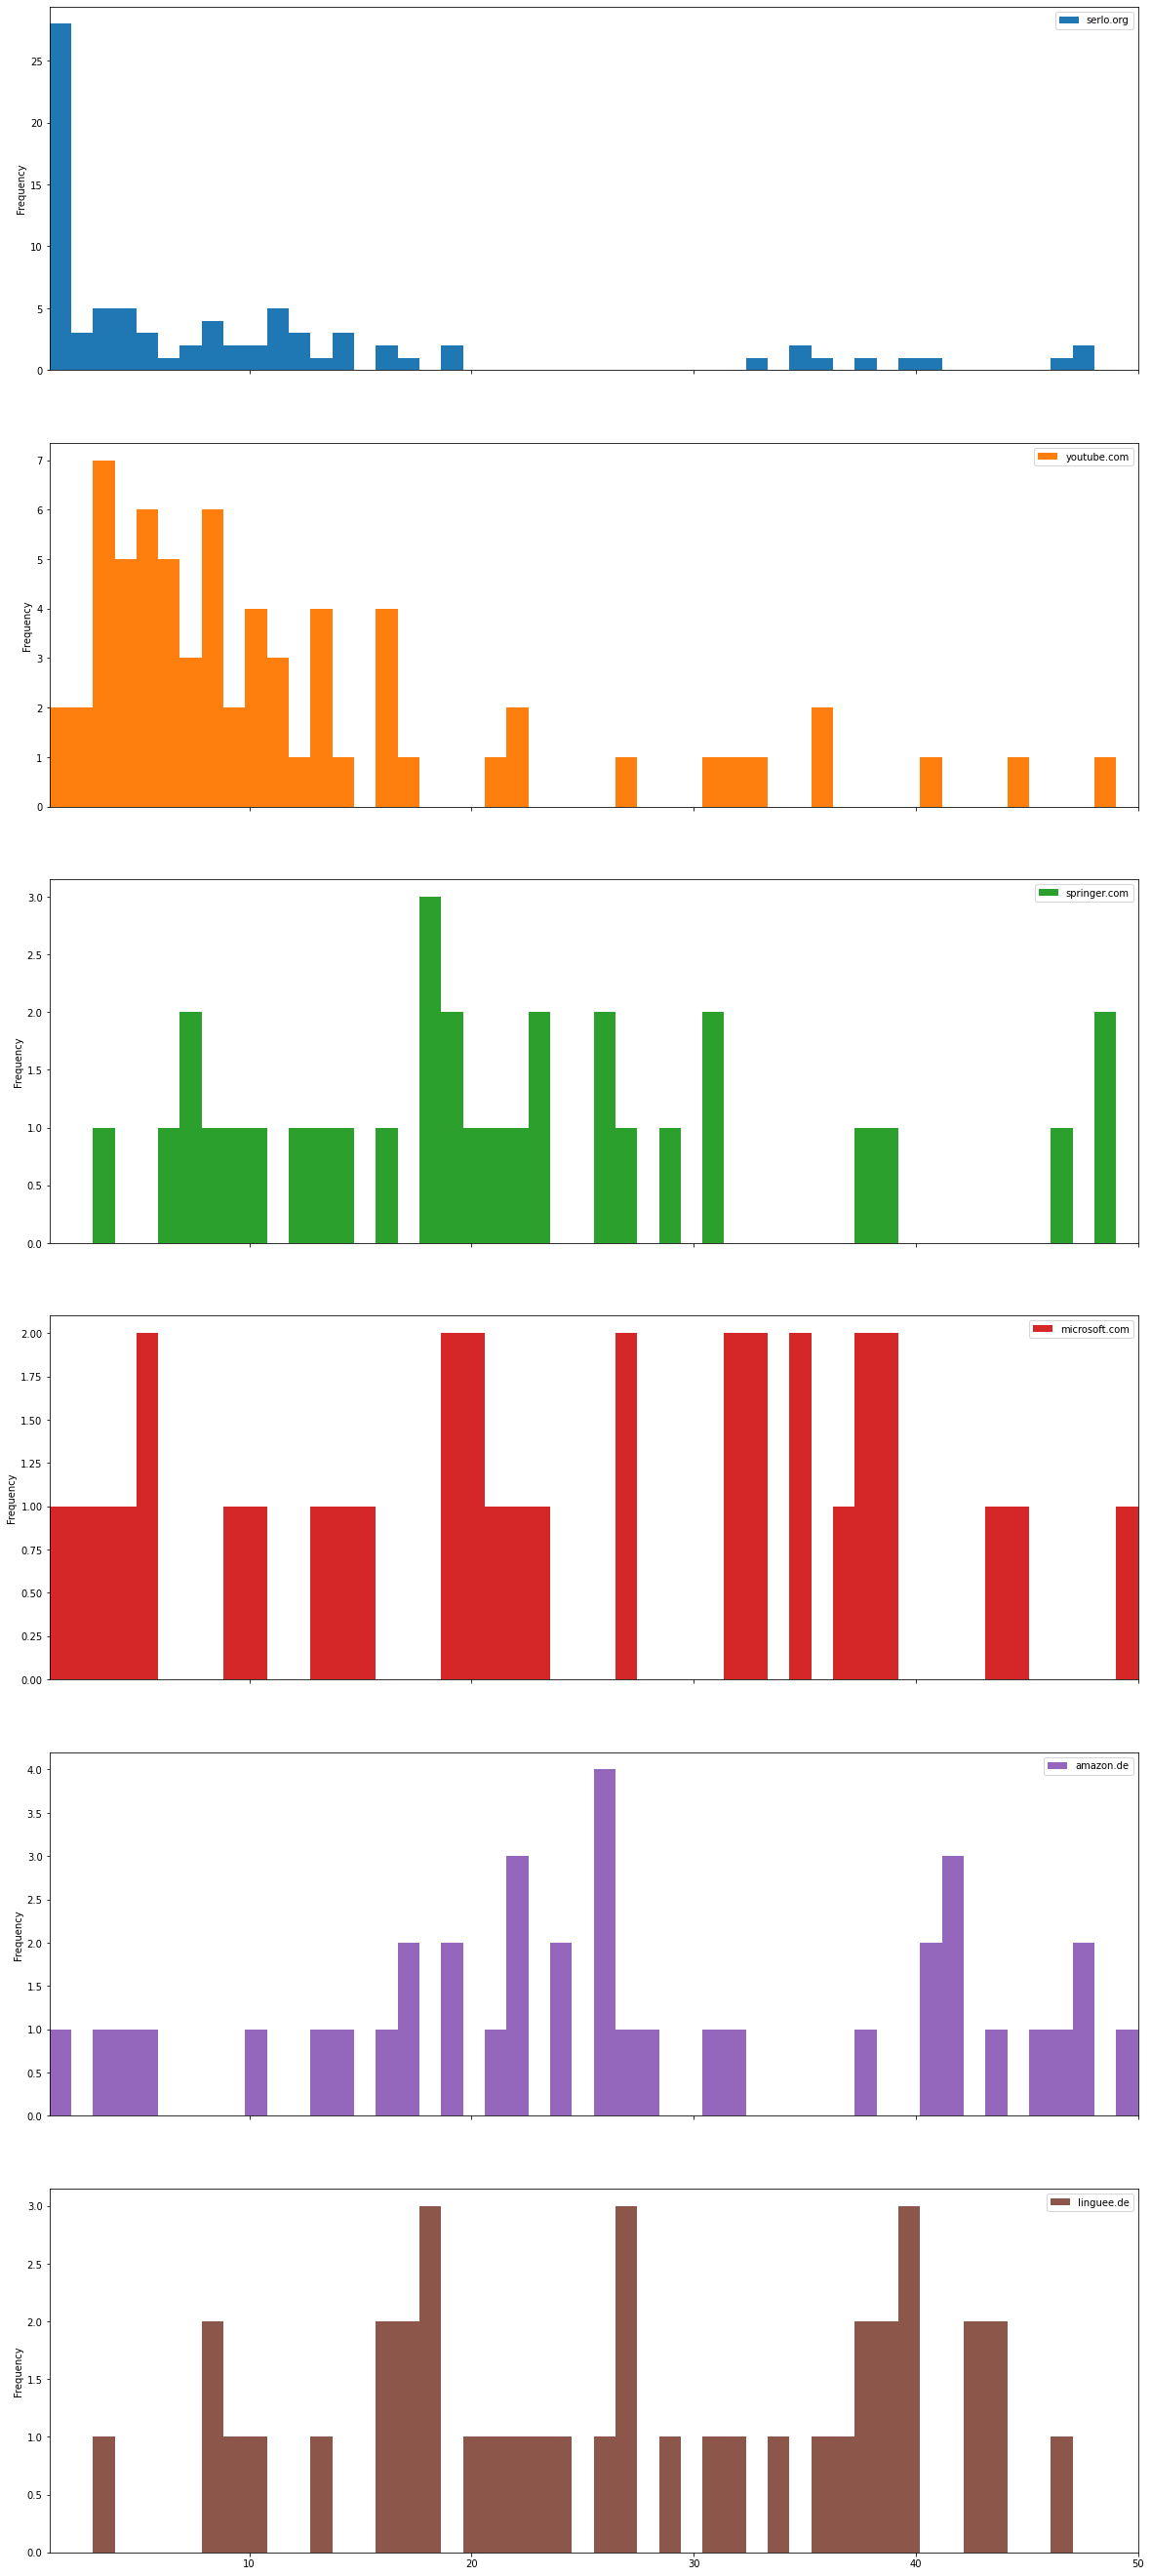

## Auswertung (subject: Nachhaltigkeit)

Die Ergebnisse umfassen sowohl den Schulbereich auf serlo.org als auch Ergebnisse vom Hochschulbereich auf wikibooks.org. Ergebnisse beider Seiten werden mit 'serlo.org' angegeben.

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 5 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mein-schoener-garten.de
* pinterest.de
* amazon.de
* ndr.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org
* wiktionary.org

### Tabelle

,serlo.org,youtube.com,mein-schoener-garten.de,pinterest.de,amazon.de,ndr.de
keyword,,,,,,
regenwasser sammeln,32.0,11.0,3.0,17.0,26.0,4.0
bodenpflege,NaN,NaN,32.0,NaN,NaN,NaN
bodenlebewesen mikroorganismen,1.0,NaN,NaN,NaN,NaN,NaN
zonierung,9.0,NaN,NaN,NaN,NaN,NaN
anleitung kräuterspirale,46.0,11.0,1.0,23.0,34.0,7.0


### Deskriptive Auswertung

,serlo.org,youtube.com,mein-schoener-garten.de,pinterest.de,amazon.de,ndr.de
count,72.000000,71.000000,42.000000,45.000000,53.000000,30.000000
mean,12.833333,13.802817,11.666667,19.444444,23.603774,17.766667
std,14.065240,11.420057,12.064191,12.668062,14.281968,13.818237
min,1.000000,3.000000,1.000000,2.000000,1.000000,1.000000
25%,1.000000,6.000000,3.000000,9.000000,10.000000,7.000000
50%,5.500000,10.000000,5.500000,17.000000,25.000000,13.000000
75%,23.250000,18.000000,19.750000,27.000000,33.000000,29.500000
max,46.000000,50.000000,44.000000,48.000000,50.000000,48.000000


### Historgramme

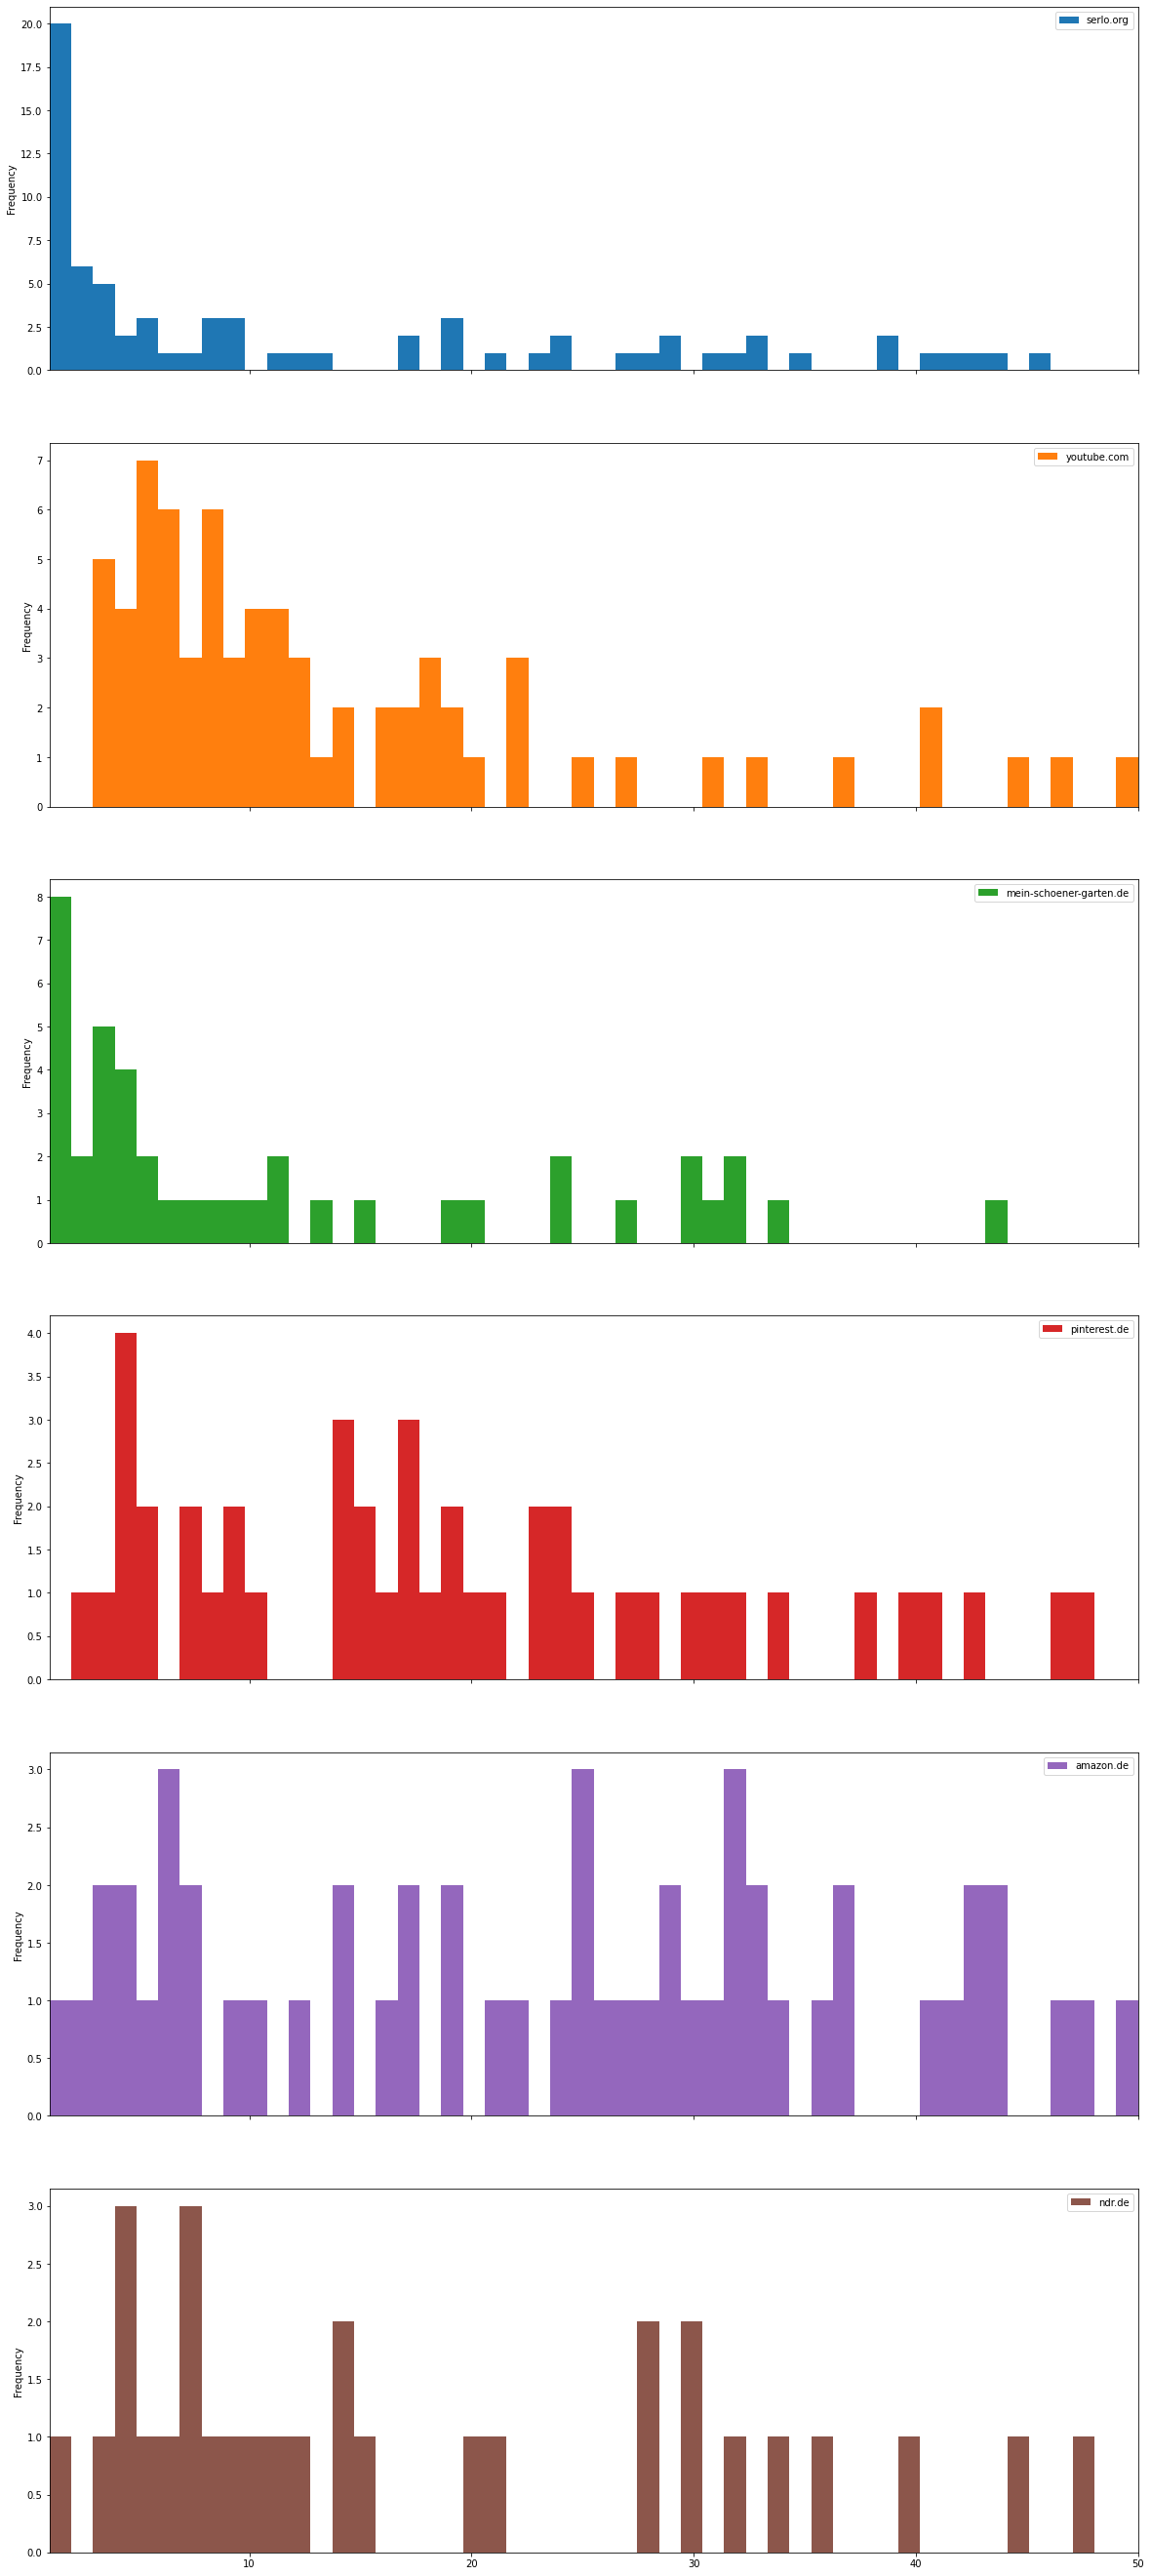

In [11]:
def get_distinct_values(prop):
    return set((entry[prop] for entry in all_keyword_entries))

for subject in get_distinct_values("subject"):
    analyse(query={"subject": subject}, blacklist=["wikipedia.org", "wiktionary.org"], no_domains=5)

## Auswertung (scope: schule)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* lernhelfer.de
* studyflix.de
* mathebibel.de
* sofatutor.com
* frustfrei-lernen.de
* springer.com

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,lernhelfer.de,studyflix.de,mathebibel.de,sofatutor.com,frustfrei-lernen.de,springer.com
keyword,,,,,,,,
radikale,NaN,23.0,18.0,NaN,NaN,NaN,NaN,45.0
teilermenge,11.0,4.0,NaN,NaN,3.0,29.0,NaN,NaN
bodenpflege,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
umkehrbare reaktionen,6.0,4.0,2.0,32.0,NaN,NaN,NaN,21.0
elektrische spannung,17.0,4.0,5.0,3.0,NaN,NaN,47.0,45.0


### Deskriptive Auswertung

,serlo.org,youtube.com,lernhelfer.de,studyflix.de,mathebibel.de,sofatutor.com,frustfrei-lernen.de,springer.com
count,852.000000,829.000000,466.000000,337.000000,297.000000,392.000000,284.000000,360.000000
mean,8.035211,7.656212,17.133047,10.842730,9.185185,20.155612,13.419014,24.411111
std,10.114209,8.163858,12.017886,11.539356,9.677715,11.785542,11.736075,12.318561
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.750000,3.000000,8.000000,4.000000,3.000000,11.000000,5.000000,15.000000
50%,4.000000,5.000000,15.000000,6.000000,5.000000,17.000000,9.000000,24.000000
75%,9.000000,9.000000,23.750000,13.000000,12.000000,28.000000,17.000000,34.000000
max,50.000000,50.000000,50.000000,50.000000,49.000000,50.000000,50.000000,50.000000


### Historgramme

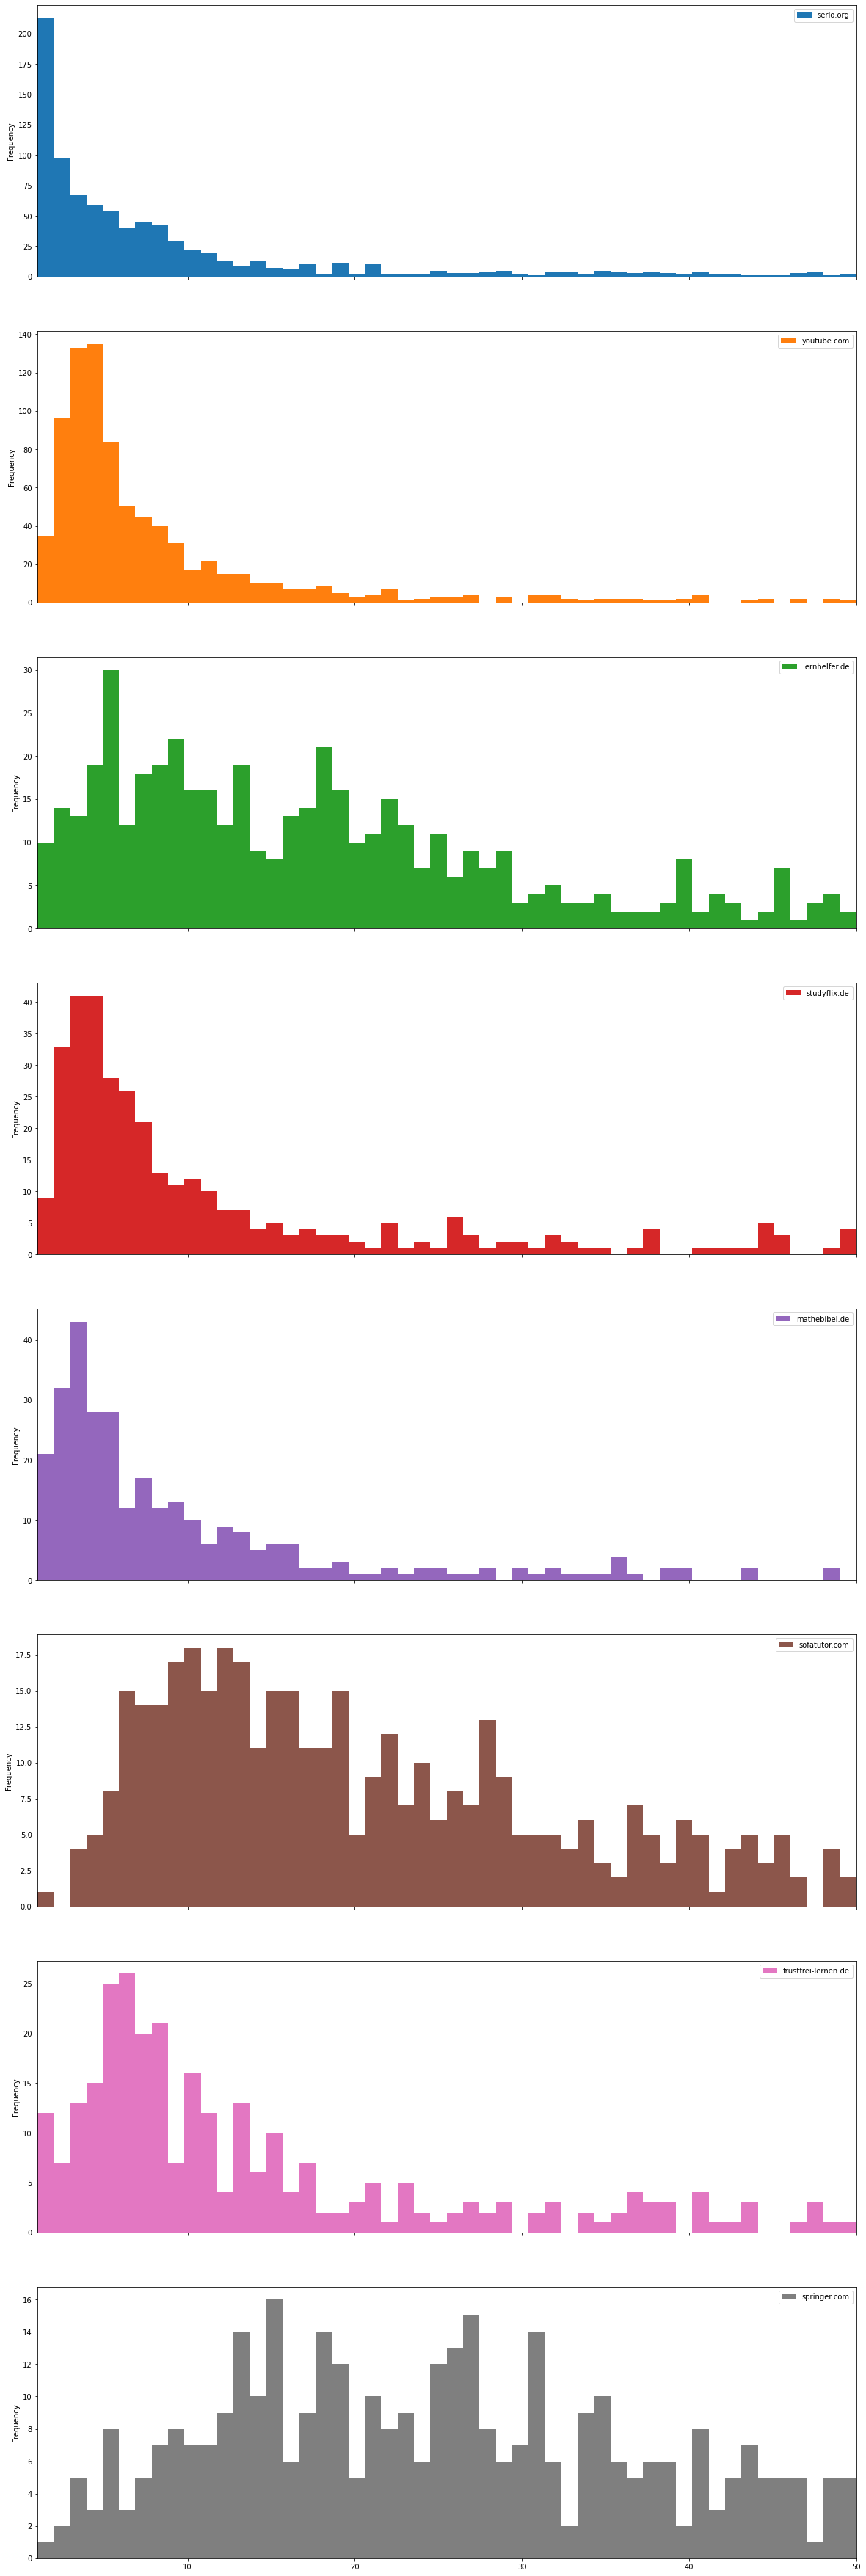

## Auswertung (scope: hochschule)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* mathelounge.de
* matheplanet.com
* mathepedia.de
* massmatics.de
* uni-hamburg.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,uni-hamburg.de
keyword,,,,,,,,
eigenschaften supremum infimum,1.0,7.0,NaN,33.0,9.0,30.0,25.0,24.0
properties linear maps,NaN,3.0,21.0,NaN,NaN,NaN,NaN,NaN
gruppen,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN
eigenschaften determinante,8.0,5.0,35.0,11.0,18.0,7.0,NaN,NaN
monotone functions,NaN,21.0,5.0,NaN,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,uni-hamburg.de
count,340.000000,366.000000,271.000000,214.000000,181.000000,152.000000,135.000000,143.000000
mean,5.379412,5.887978,22.394834,21.556075,23.292818,18.157895,15.725926,22.496503
std,6.213520,6.058258,11.772025,12.015801,13.040850,13.916071,12.896505,13.884774
min,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000
25%,1.000000,3.000000,13.000000,12.000000,13.000000,6.750000,5.000000,11.000000
50%,3.000000,4.000000,21.000000,19.500000,21.000000,12.000000,11.000000,19.000000
75%,7.000000,7.000000,30.000000,29.750000,33.000000,29.000000,25.000000,33.500000
max,46.000000,48.000000,50.000000,49.000000,50.000000,50.000000,49.000000,50.000000


### Historgramme

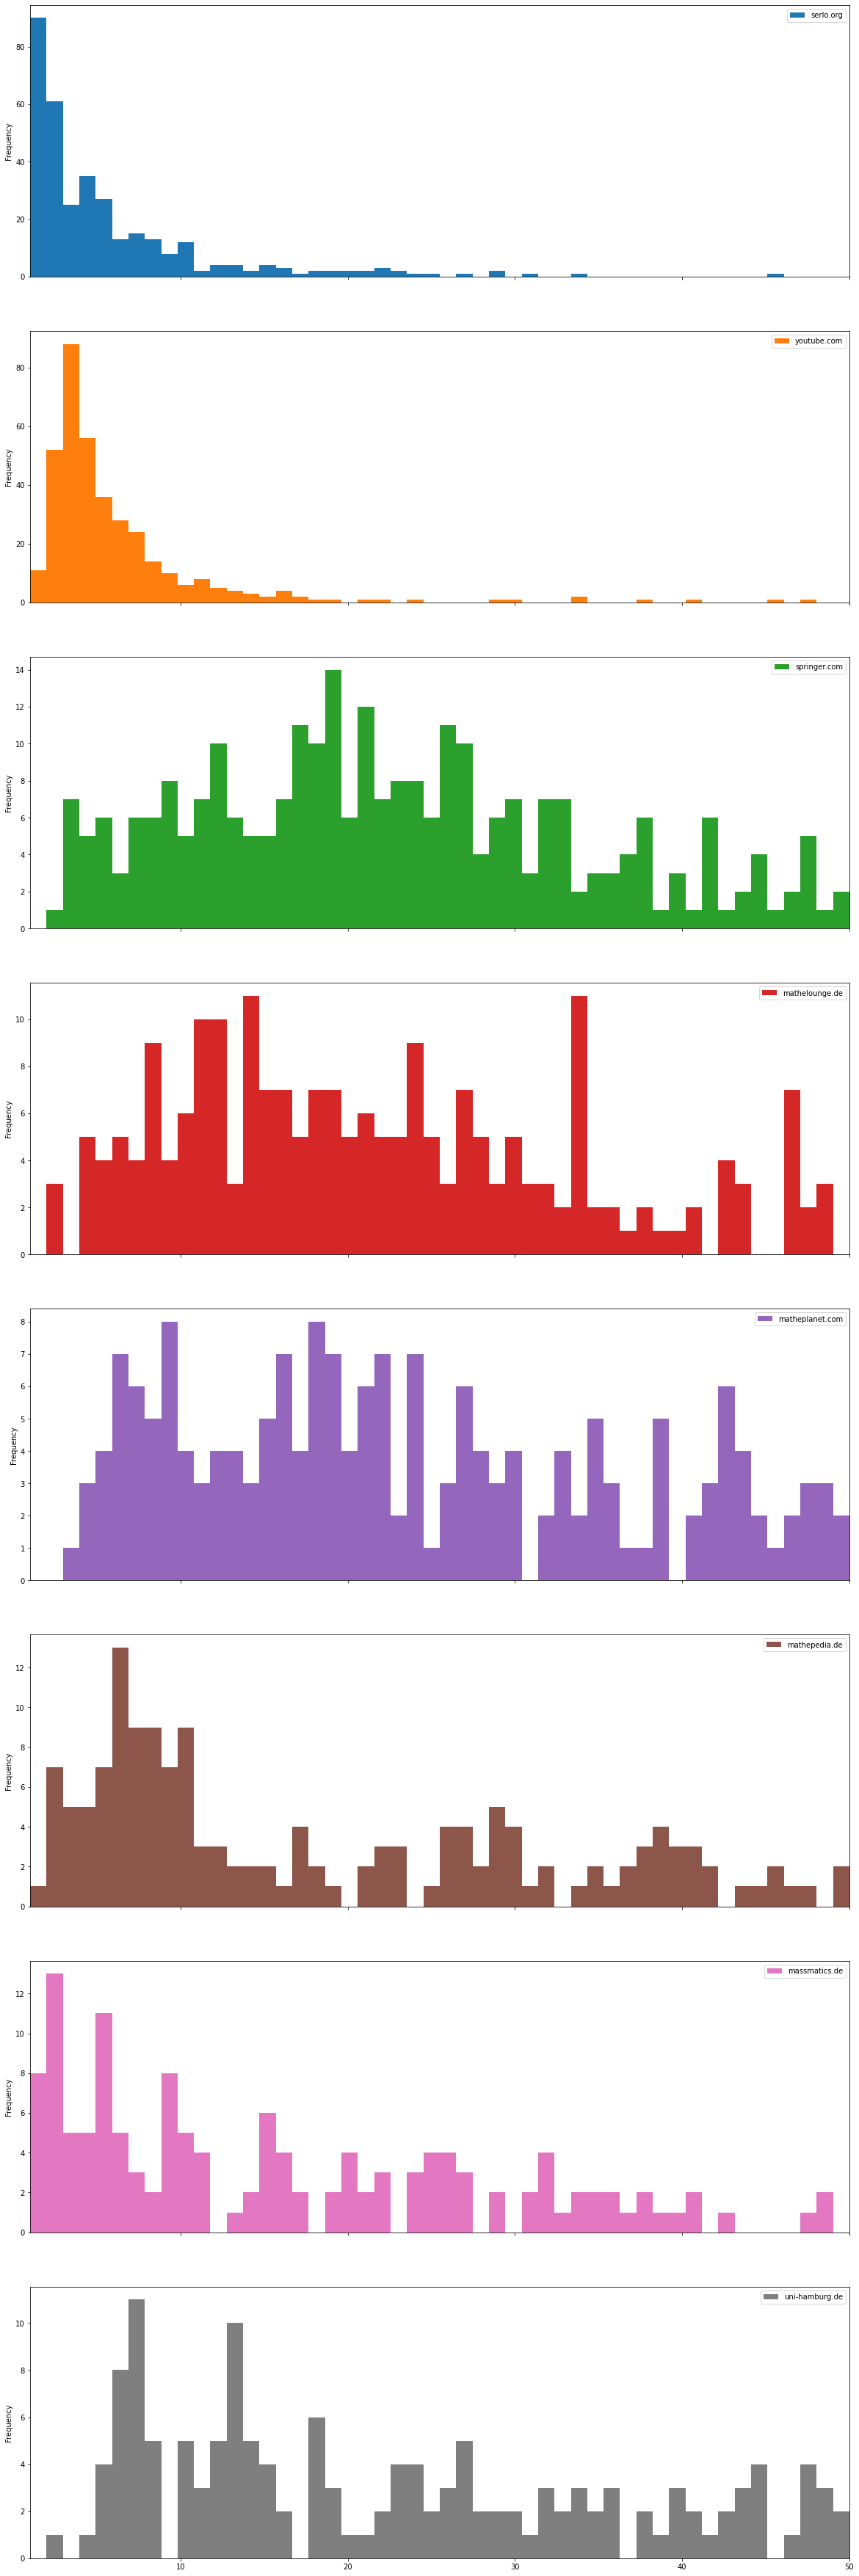

In [12]:
def get_distinct_values(prop):
    return set((entry[prop] for entry in all_keyword_entries))

for scope in get_distinct_values("scope"):
    analyse(query={"scope": scope}, blacklist=["wikipedia.org"], no_domains=7)

# Auswertung: Hochschulbereich Deutsch

## Auswertung (scope: hochschule, language: de)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* springer.com
* mathelounge.de
* matheplanet.com
* mathepedia.de
* massmatics.de
* uni-hamburg.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,uni-hamburg.de
keyword,,,,,,,,
eigenschaften supremum infimum,1.0,7.0,NaN,33.0,9.0,30.0,25.0,24.0
properties linear maps,NaN,3.0,21.0,NaN,NaN,NaN,NaN,NaN
gruppen,NaN,41.0,NaN,NaN,NaN,NaN,NaN,NaN
eigenschaften determinante,8.0,5.0,35.0,11.0,18.0,7.0,NaN,NaN
monotone functions,NaN,21.0,5.0,NaN,NaN,NaN,NaN,NaN


### Deskriptive Auswertung

,serlo.org,youtube.com,springer.com,mathelounge.de,matheplanet.com,mathepedia.de,massmatics.de,uni-hamburg.de
count,340.000000,366.000000,271.000000,214.000000,181.000000,152.000000,135.000000,143.000000
mean,5.379412,5.887978,22.394834,21.556075,23.292818,18.157895,15.725926,22.496503
std,6.213520,6.058258,11.772025,12.015801,13.040850,13.916071,12.896505,13.884774
min,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.000000
25%,1.000000,3.000000,13.000000,12.000000,13.000000,6.750000,5.000000,11.000000
50%,3.000000,4.000000,21.000000,19.500000,21.000000,12.000000,11.000000,19.000000
75%,7.000000,7.000000,30.000000,29.750000,33.000000,29.000000,25.000000,33.500000
max,46.000000,48.000000,50.000000,49.000000,50.000000,50.000000,49.000000,50.000000


### Historgramme

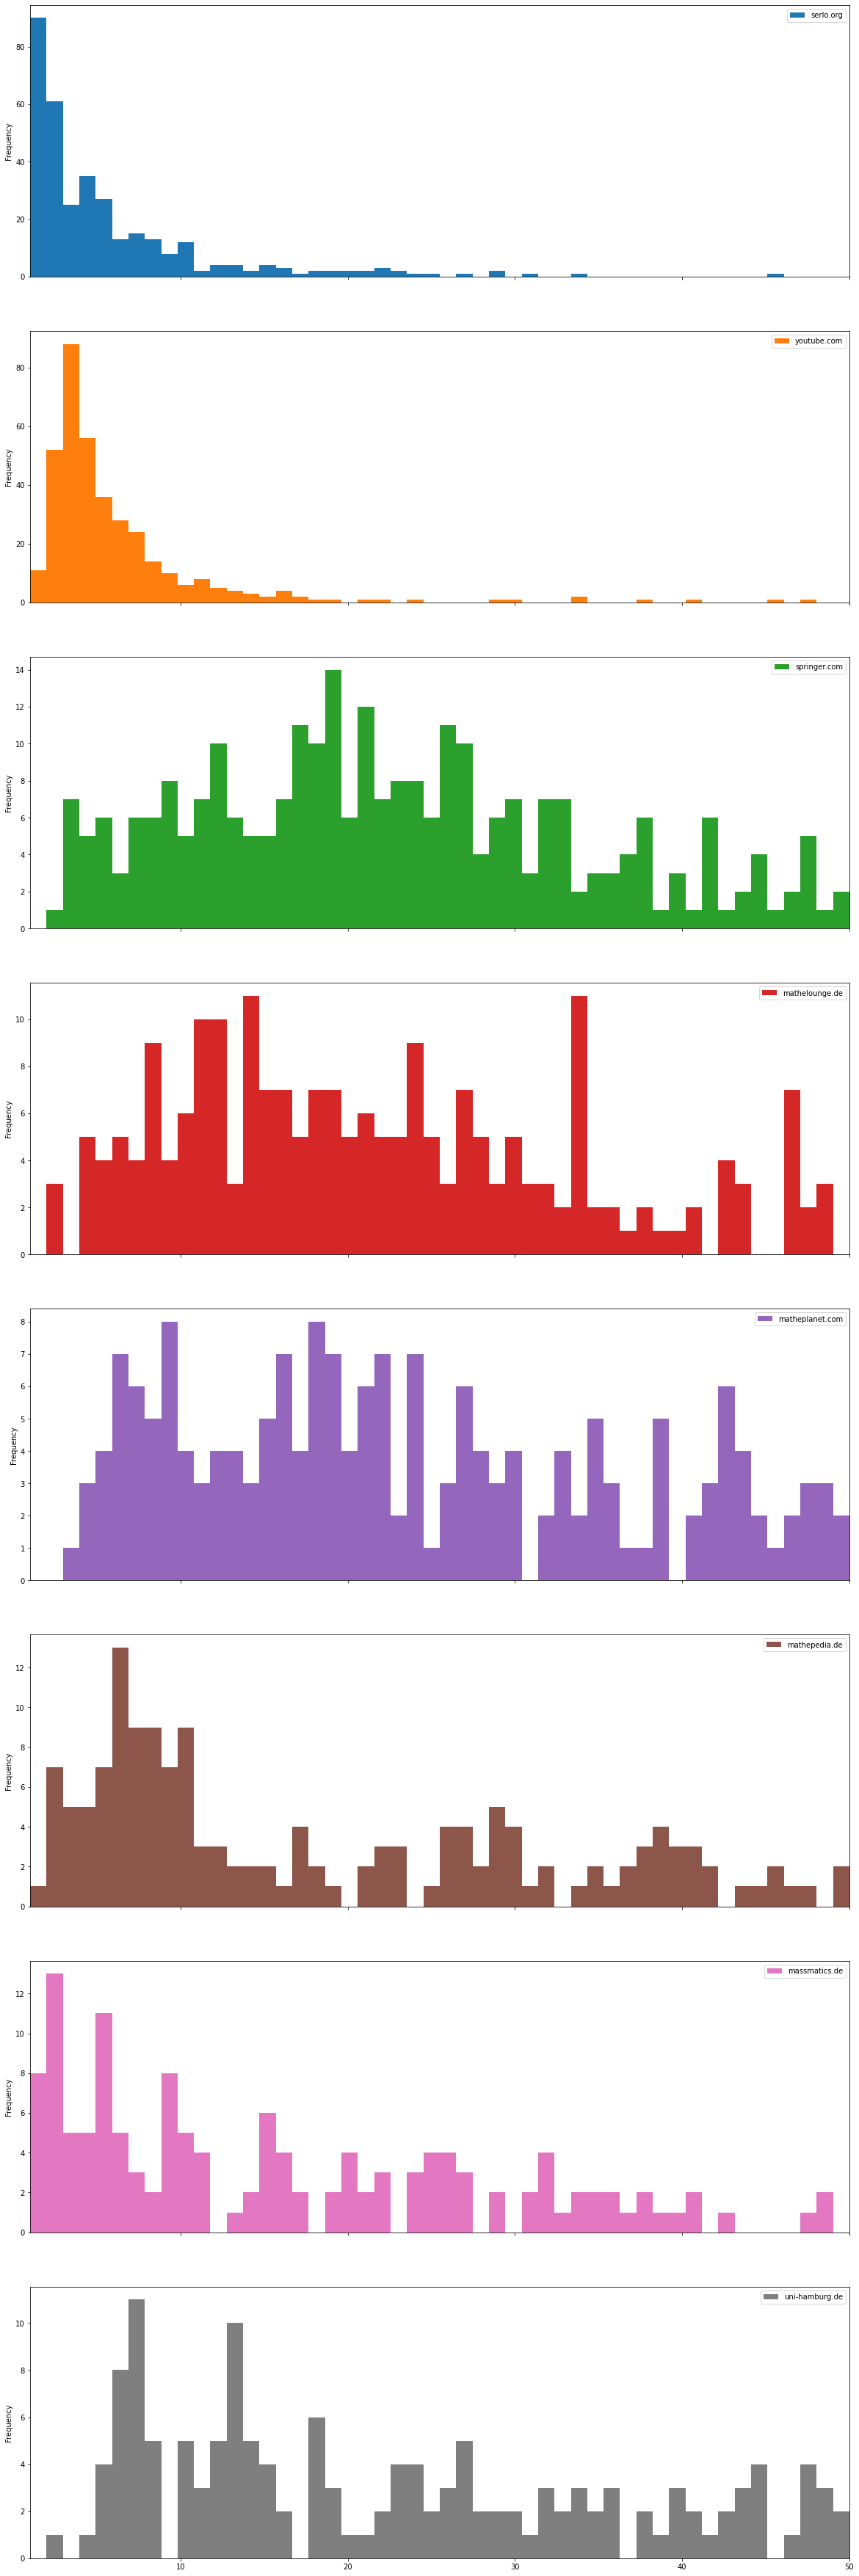

In [13]:
analyse(query={"scope": "hochschule", "language": "de"}, blacklist=["wikipedia.org"], no_domains=7)

In [15]:
analyse(query={"scope": "hochschule", "language": "en"}, blacklist=["wikipedia.org"], no_domains=7)

## Auswertung (scope: hochschule, language: en)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org
keyword,


### Deskriptive Auswertung

,serlo.org
count,0
unique,0
top,NaN
freq,NaN


### Historgramme

ValueError: cannot convert float NaN to integer

# Auswertung: Schulmathematik

## Auswertung (scope: schule, subject: Mathe)

Auswertung für folgende Webseiten:

* serlo.org

Zum Vergleich werden die besten 7 weiteren Webseiten anhand der Suchergebnisse mitangezeigt. Diese sind:

* youtube.com
* mathebibel.de
* kapiert.de
* gut-erklaert.de
* frustfrei-lernen.de
* sofatutor.com
* lernhelfer.de

Bei der Analyse der weiteren Webseiten wurde ausgeschlossen

* wikipedia.org

### Tabelle

,serlo.org,youtube.com,mathebibel.de,kapiert.de,gut-erklaert.de,frustfrei-lernen.de,sofatutor.com,lernhelfer.de
keyword,,,,,,,,
teilermenge,11.0,4.0,3.0,NaN,17.0,NaN,29.0,NaN
orthogonale affinität,1.0,2.0,NaN,NaN,NaN,NaN,4.0,39.0
satz nullprodukt,6.0,3.0,2.0,NaN,NaN,NaN,4.0,NaN
lineare gleichung,7.0,4.0,3.0,9.0,2.0,17.0,36.0,19.0
koordinatensystem,10.0,3.0,28.0,1.0,7.0,8.0,15.0,22.0


### Deskriptive Auswertung

,serlo.org,youtube.com,mathebibel.de,kapiert.de,gut-erklaert.de,frustfrei-lernen.de,sofatutor.com,lernhelfer.de
count,454.000000,441.000000,293.000000,225.000000,238.000000,238.000000,272.000000,269.000000
mean,5.416300,5.301587,9.201365,11.782222,12.983193,13.147059,19.981618,19.531599
std,6.527294,5.525332,9.736796,9.802589,11.905736,11.566329,11.760354,11.832630
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,3.000000,3.000000,4.000000,5.000000,5.250000,11.000000,10.000000
50%,3.000000,4.000000,5.000000,9.000000,8.000000,8.500000,17.000000,18.000000
75%,7.000000,6.000000,12.000000,16.000000,17.000000,16.750000,27.000000,26.000000
max,49.000000,49.000000,49.000000,43.000000,49.000000,50.000000,50.000000,50.000000


### Historgramme

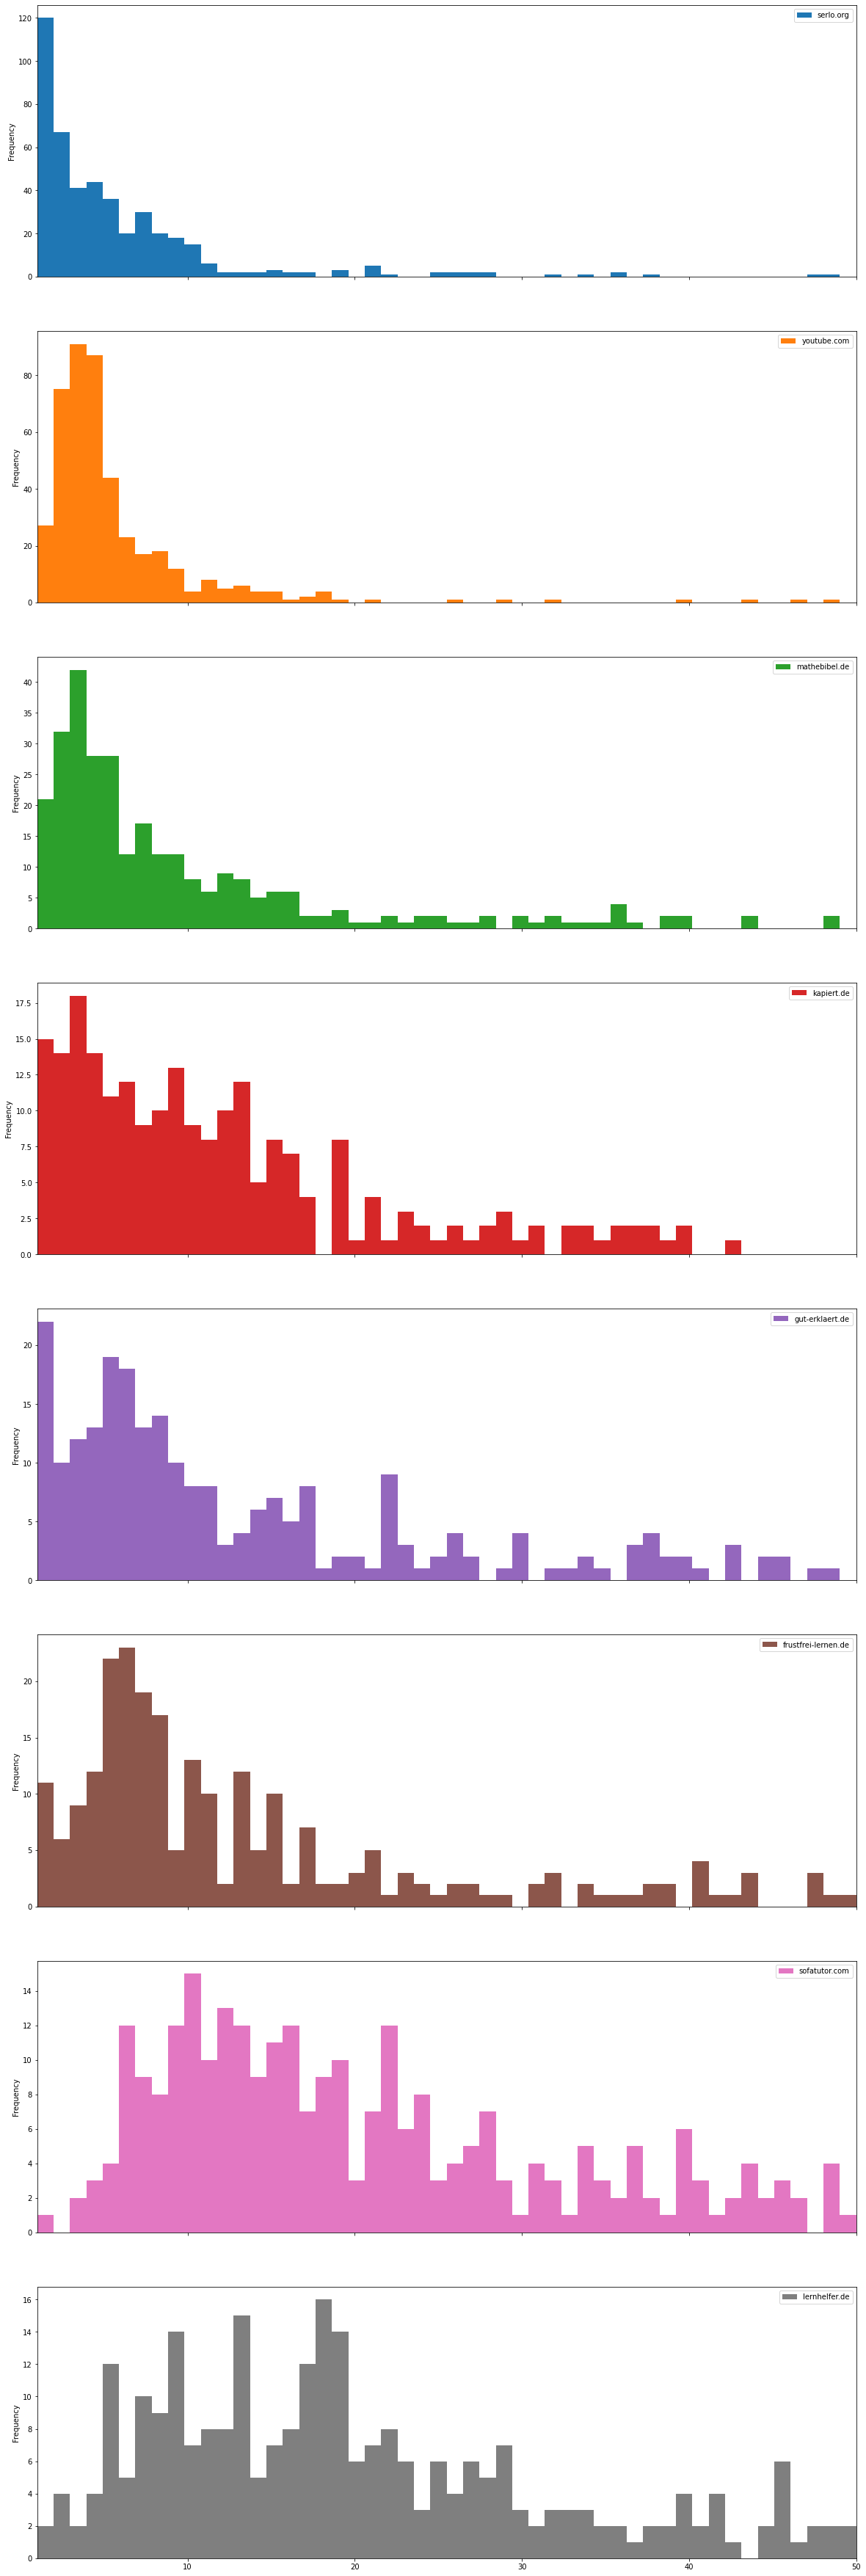

In [14]:
analyse(query={"scope": "schule", "subject": "Mathe"}, blacklist=["wikipedia.org"], no_domains=7)